## KLOOK客路旅行数据分析
### 台北101观景台门票售卖数据


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='KaiTi')

df = pd.read_csv('../dataSets/4.KLOOK_travel/kelu.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [2]:
# 将时间转化为datetime类型
df['time'] = pd.to_datetime(df['time'])
df

,author,rating,time,year,amount,frequency
0,YOUNG,60,2019-02-28,2019,110,1
1,SHING YAN,100,2019-02-28,2019,110,1
2,Sha,60,2019-02-28,2019,110,1
3,Mary Mae,100,2019-02-28,2019,110,1
4,Maria Cristina,100,2019-02-28,2019,110,1
...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1
8754,Halley,100,2016-08-05,2016,110,1
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1


In [3]:
df.describe()

,rating,time,year,amount,frequency
count,8757.000000,8757,8757.000000,8757.0,8757.0
mean,92.417495,2018-04-20 00:24:30.092497664,2017.760420,110.0,1.0
min,20.000000,2016-08-02 00:00:00,2016.000000,110.0,1.0
25%,80.000000,2017-11-11 00:00:00,2017.000000,110.0,1.0
50%,100.000000,2018-06-09 00:00:00,2018.000000,110.0,1.0
75%,100.000000,2018-10-30 00:00:00,2018.000000,110.0,1.0
max,100.000000,2019-02-28 00:00:00,2019.000000,110.0,1.0
std,14.231179,NaN,0.686734,0.0,0.0


### 对每天的销售数据进行分析

Text(0.5, 1.0, '每日销量变化图')

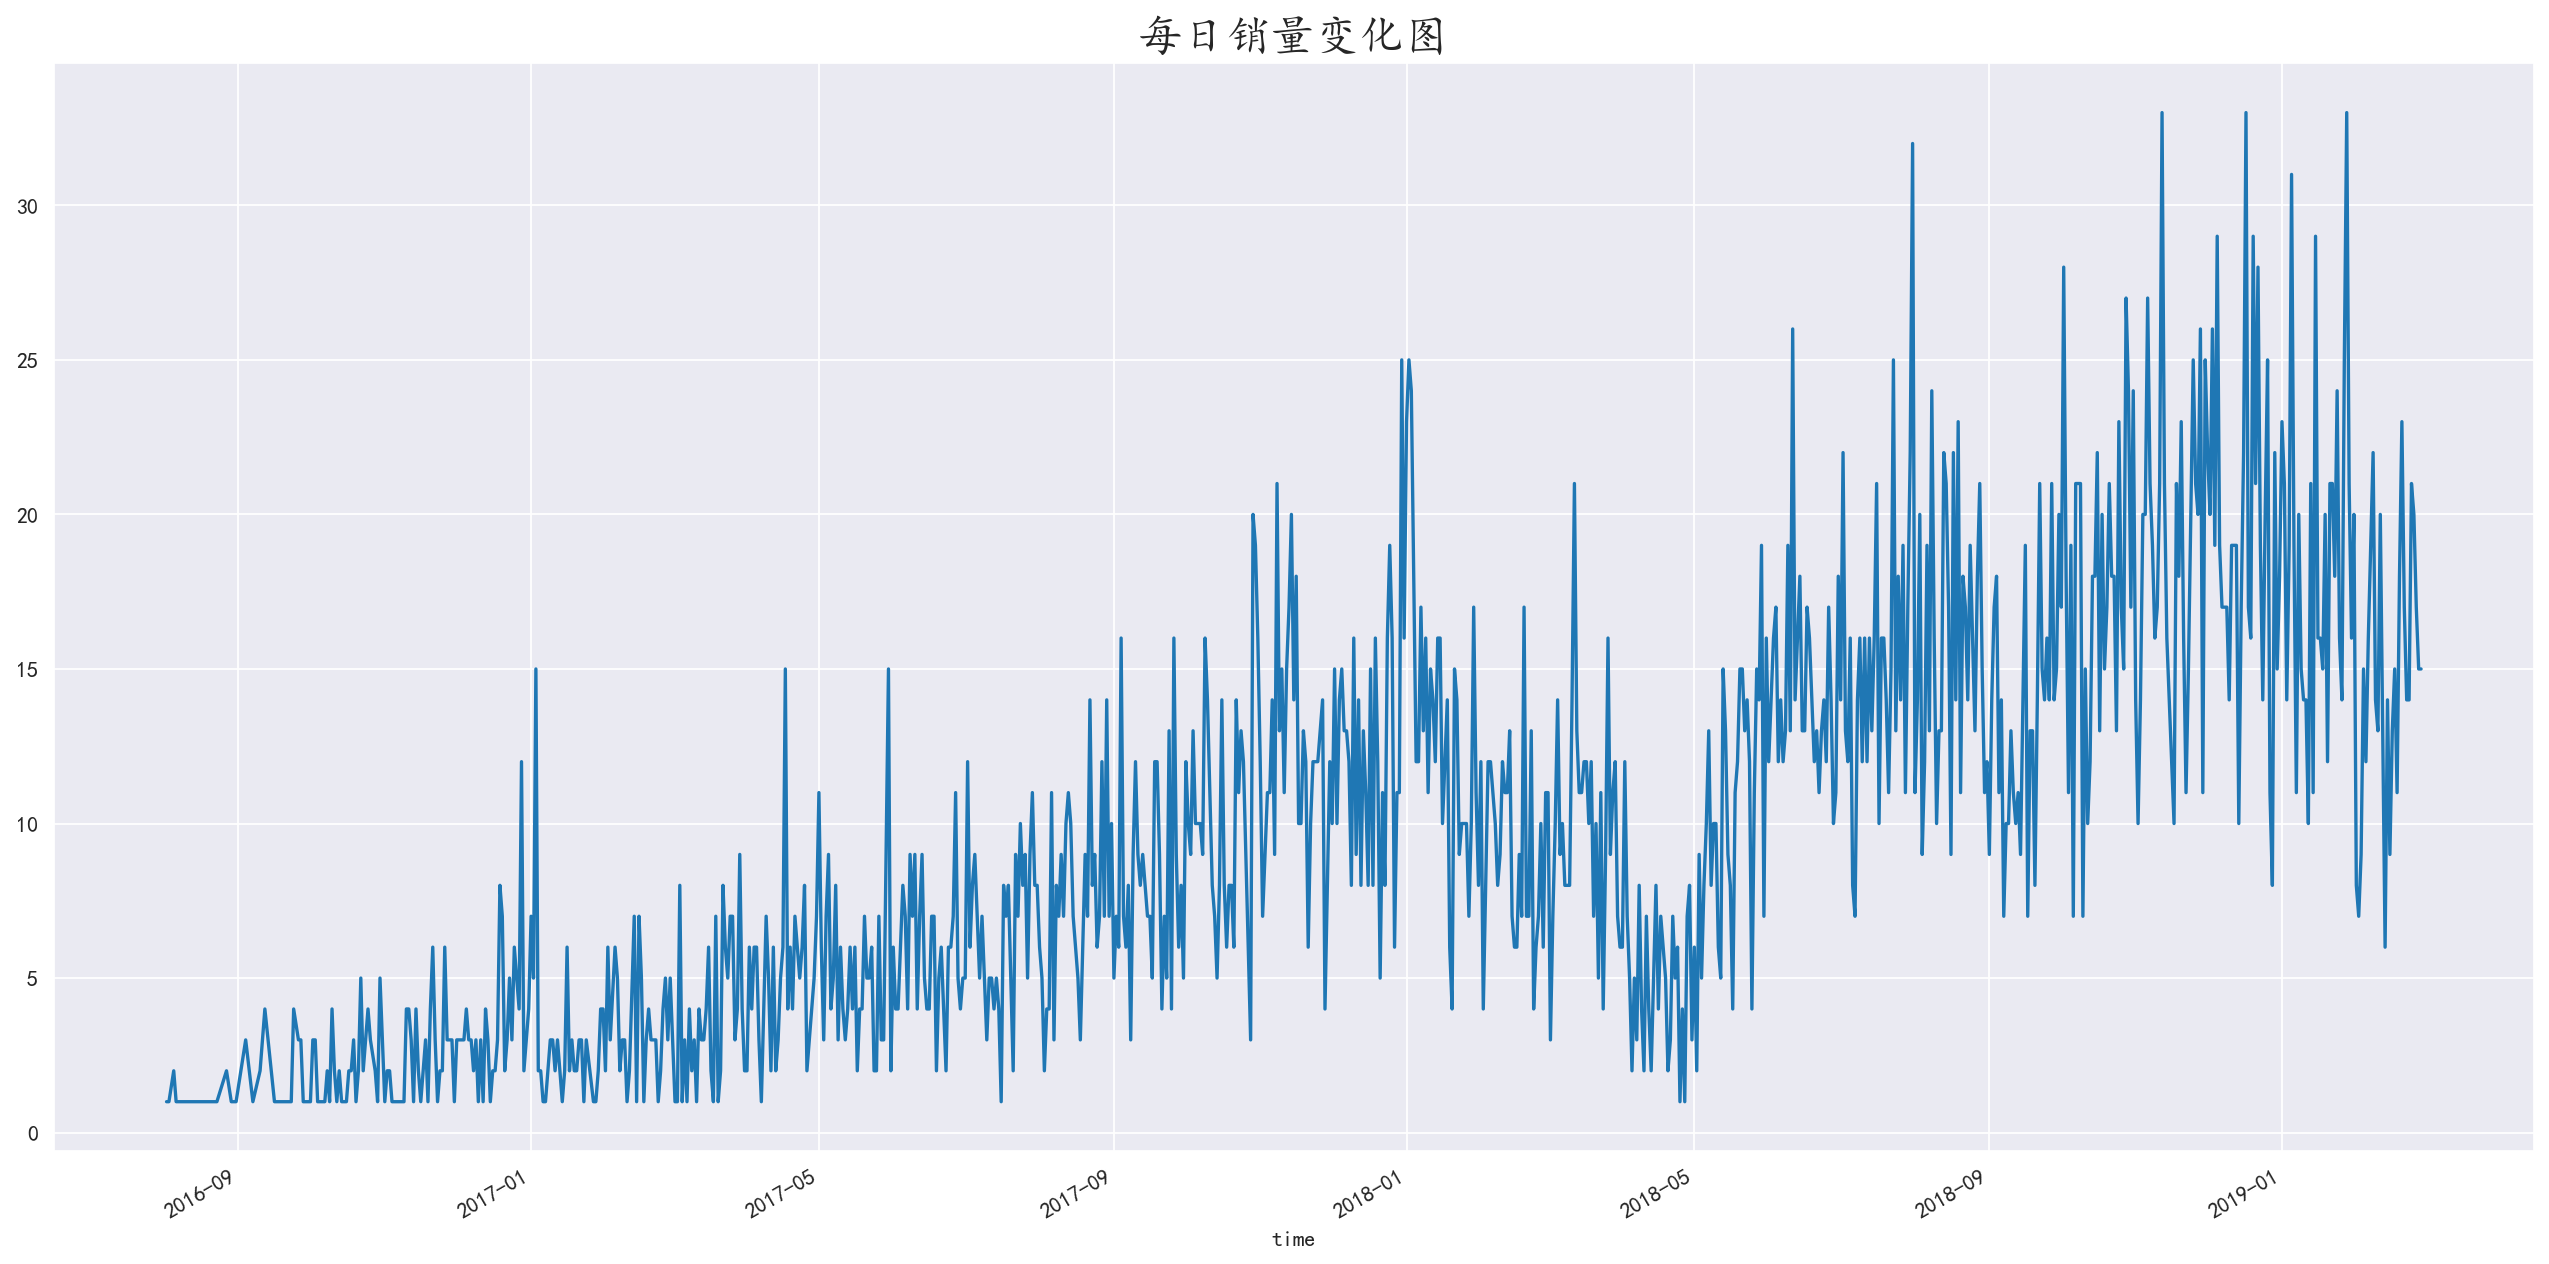

In [4]:
daily_sell_num = df.groupby(by='time').count()['frequency']
plt.figure(figsize=(20,10), dpi=160)
daily_sell_num.plot()
plt.title("每日销量变化图", fontsize=20)


Text(0.5, 1.0, '每月销量变化图')

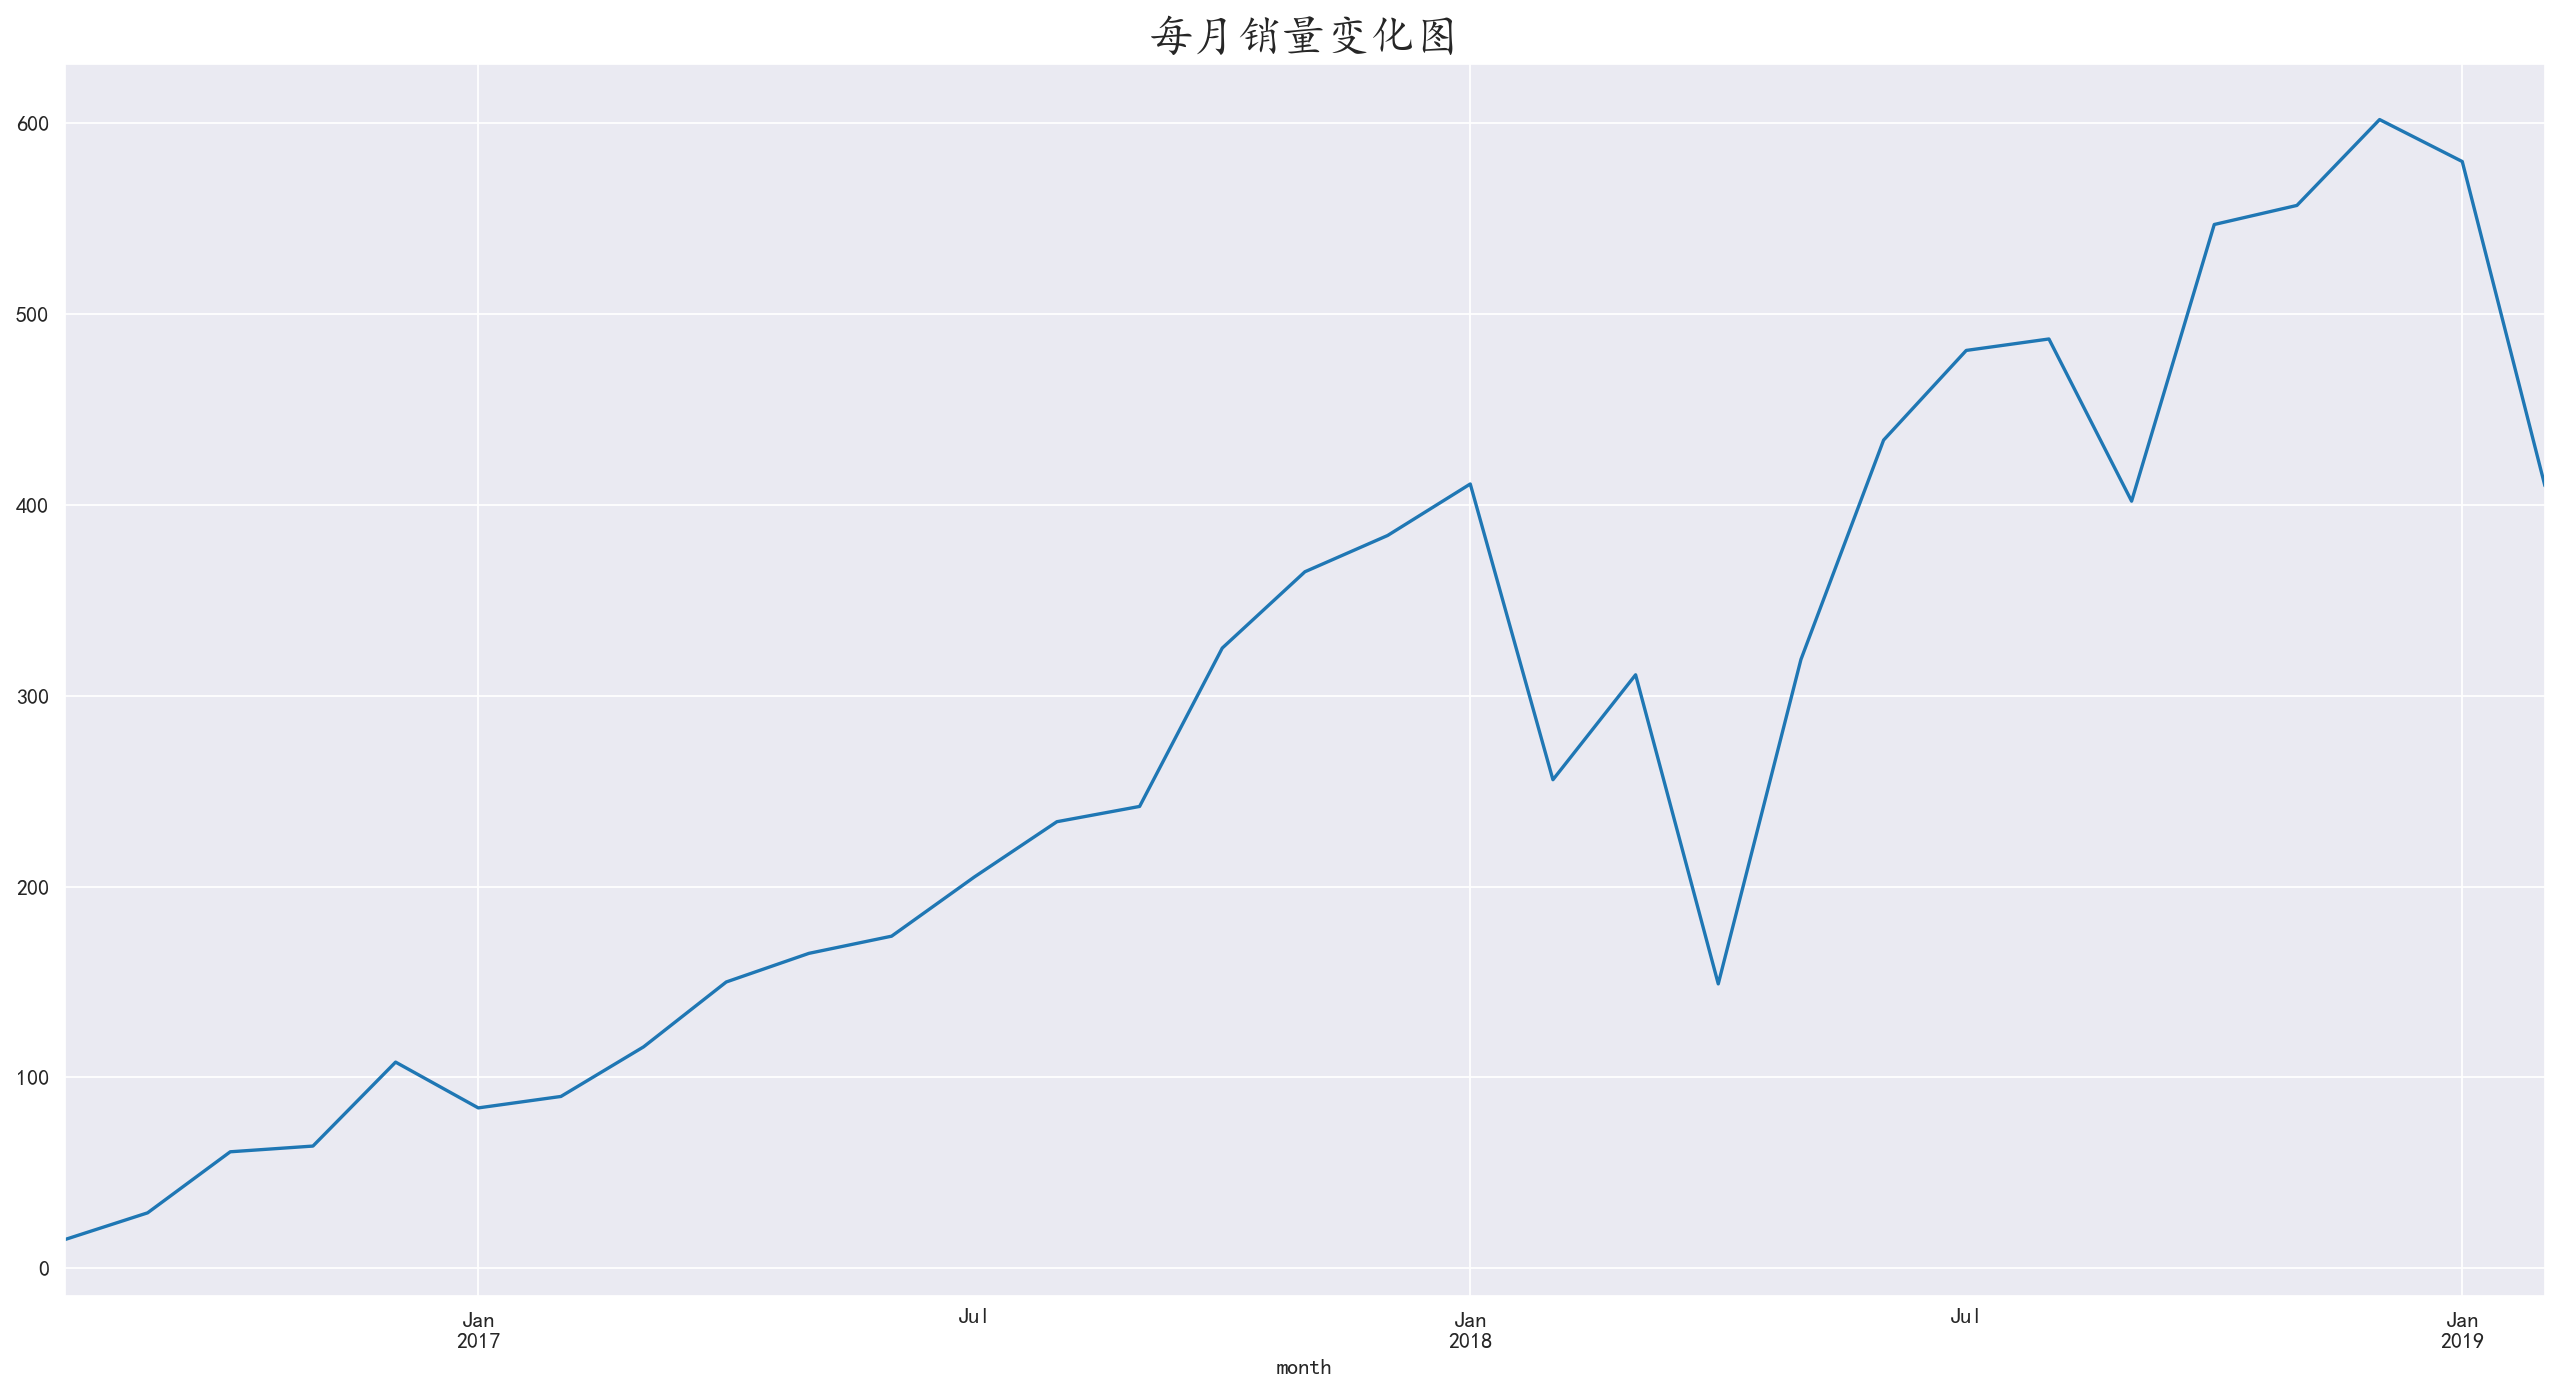

In [5]:
# 新建月份列
df['month'] = df['time'].dt.to_period('M')

plt.figure(figsize=(20,10), dpi=160)
df.groupby(by='month').count()['frequency'].plot()
plt.title("每月销量变化图", fontsize=20)

Text(0, 0.5, '购买金额')

<Figure size 4000x2000 with 0 Axes>

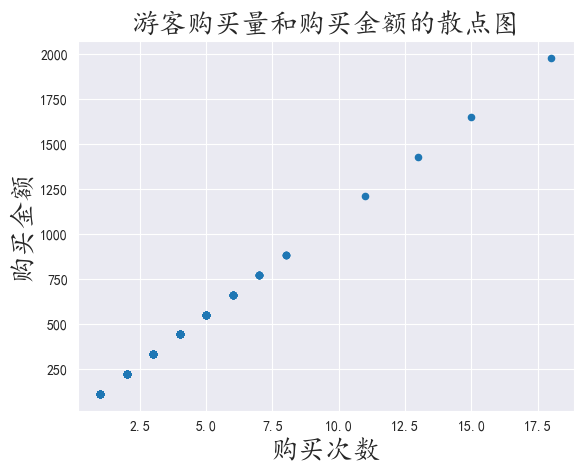

In [6]:
# 分组每个游客的购买次数
visitor_order_count = df.groupby(by='author')['frequency'].count().reset_index()
# 分组每个游客的购买金额
visitor_order_sum = df.groupby(by='author')['amount'].sum().reset_index()
# 将两个表组合
visitor_order_data = pd.merge(left=visitor_order_count, right=visitor_order_sum, on='author')
plt.figure(figsize=(20,10), dpi=200)
visitor_order_data.plot.scatter(x='frequency', y='amount')
plt.title("游客购买量和购买金额的散点图", fontsize=20)
plt.xlabel('购买次数', fontsize=20)
plt.ylabel('购买金额', fontsize=20)

Text(0, 0.5, '人数')

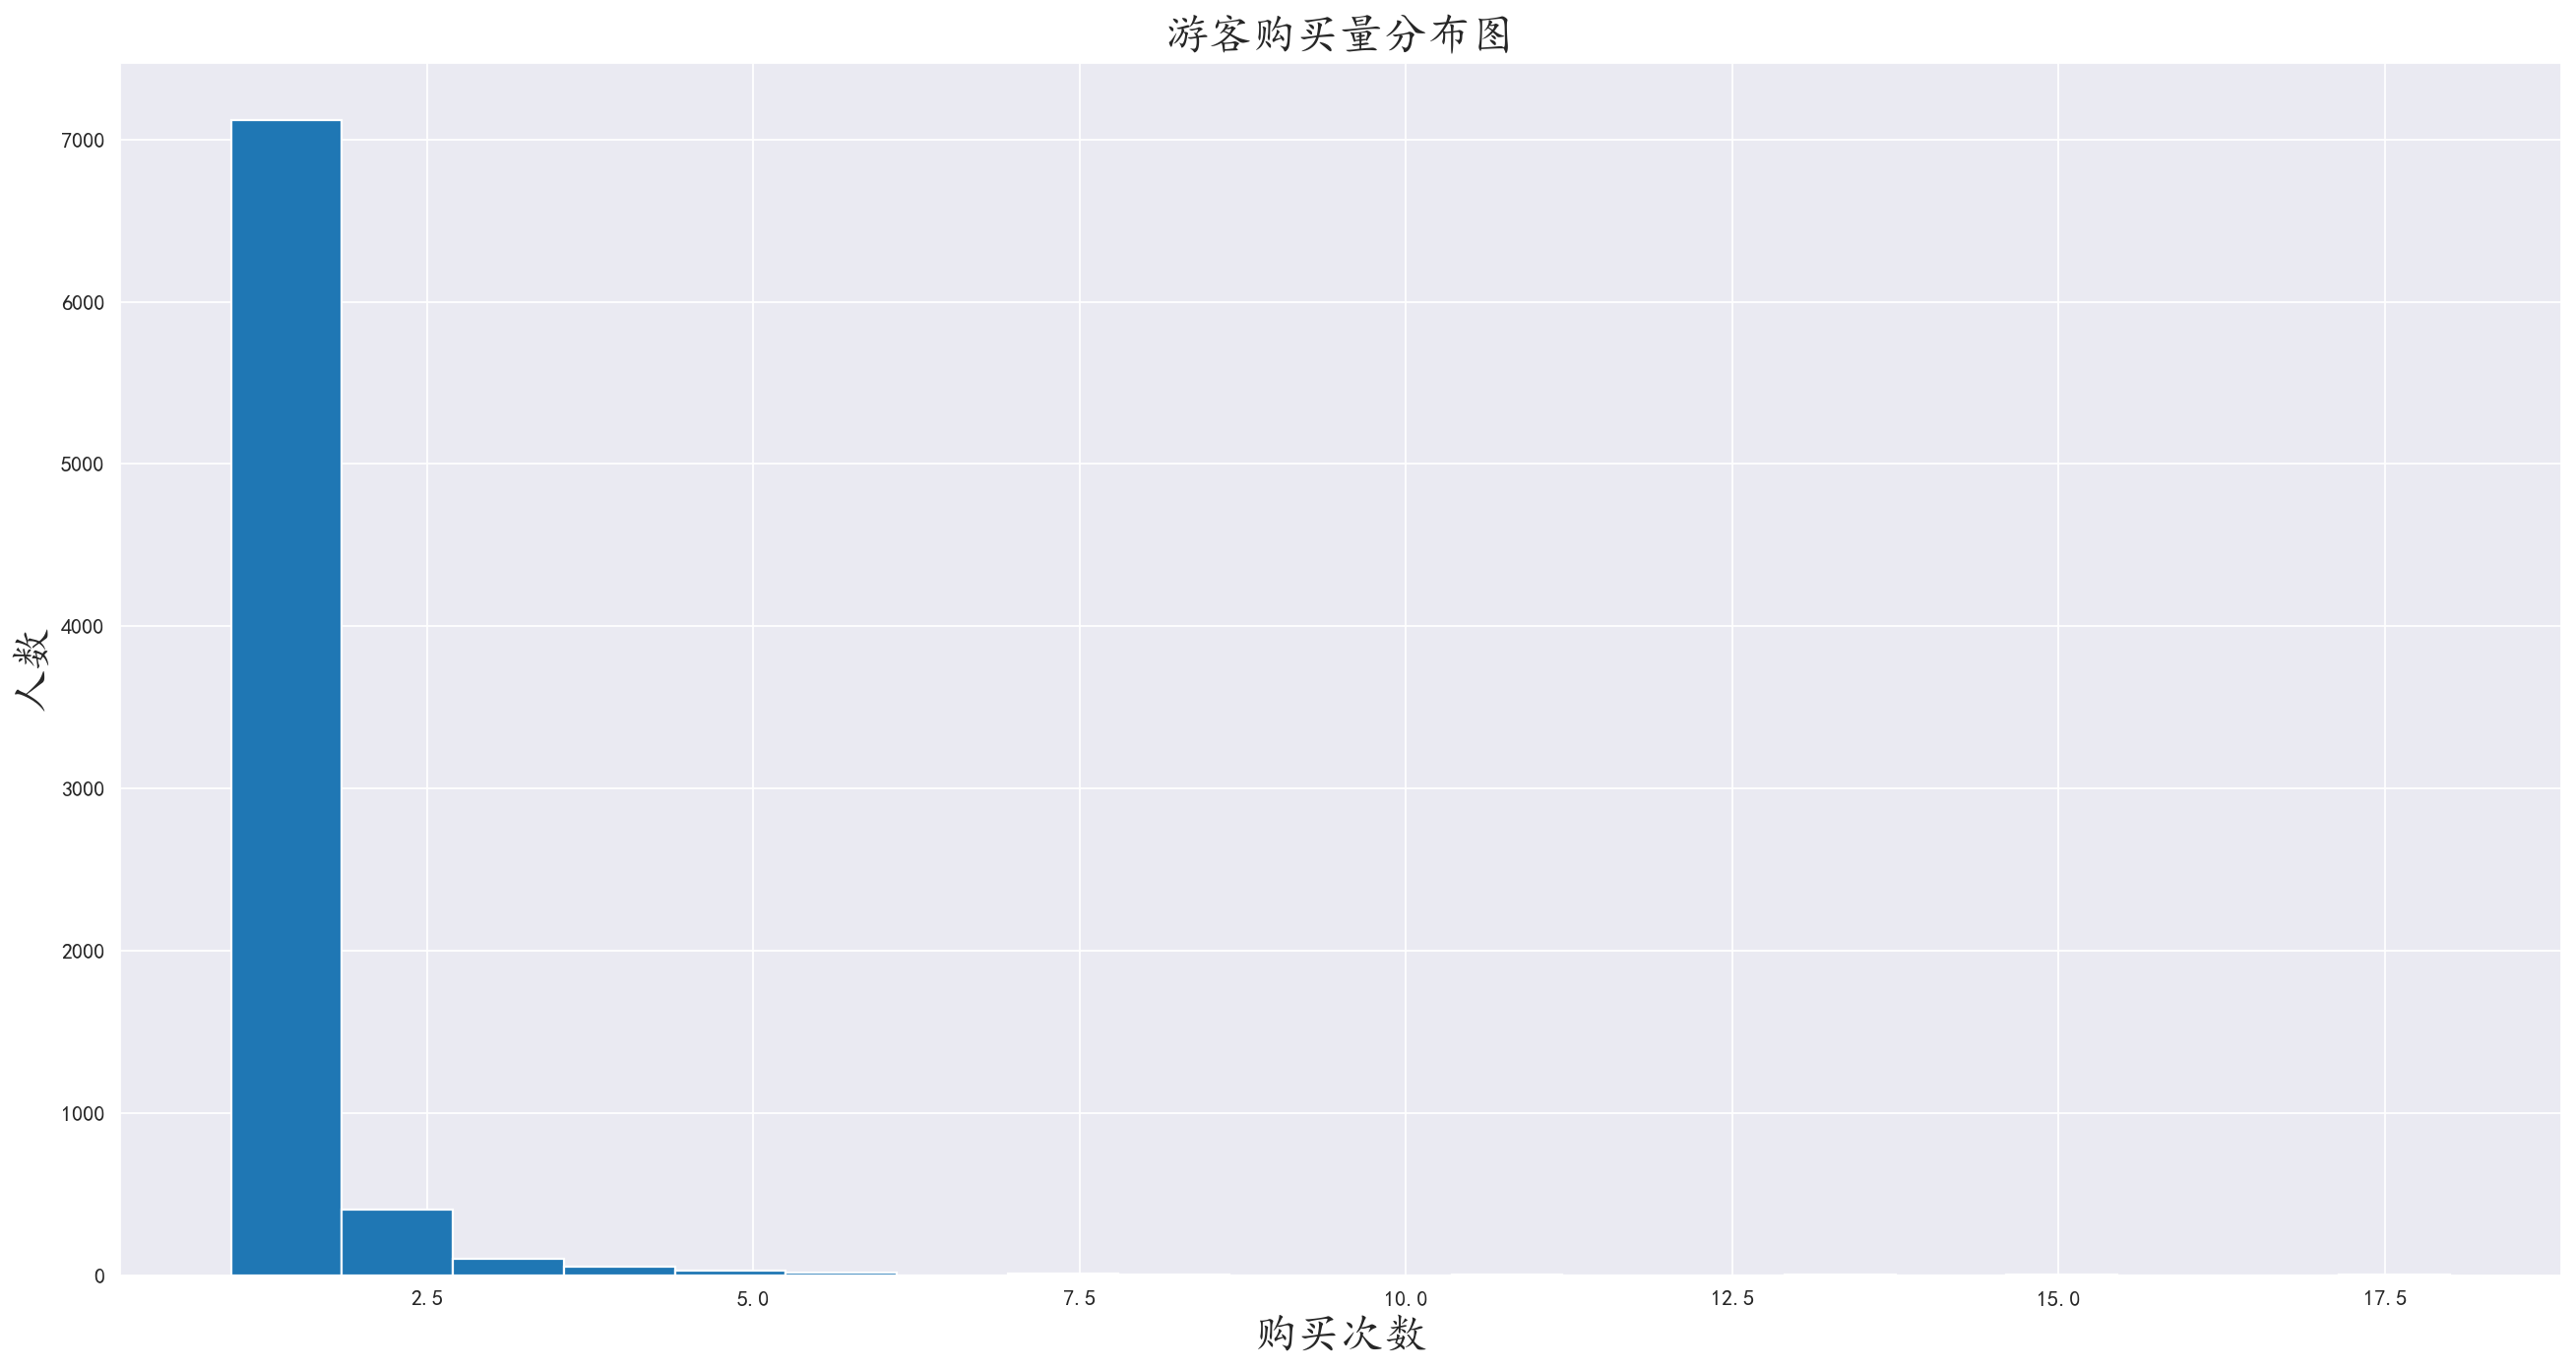

In [7]:
# 用户购买门票次数的统计
plt.figure(figsize=(20,10), dpi=160)
visitor_order_data['frequency'].plot(kind='hist', bins = 20)
plt.title("游客购买量分布图", fontsize=20)
plt.xlabel('购买次数', fontsize=20)
plt.ylabel('人数', fontsize=20)

Text(0, 0.5, '人数')

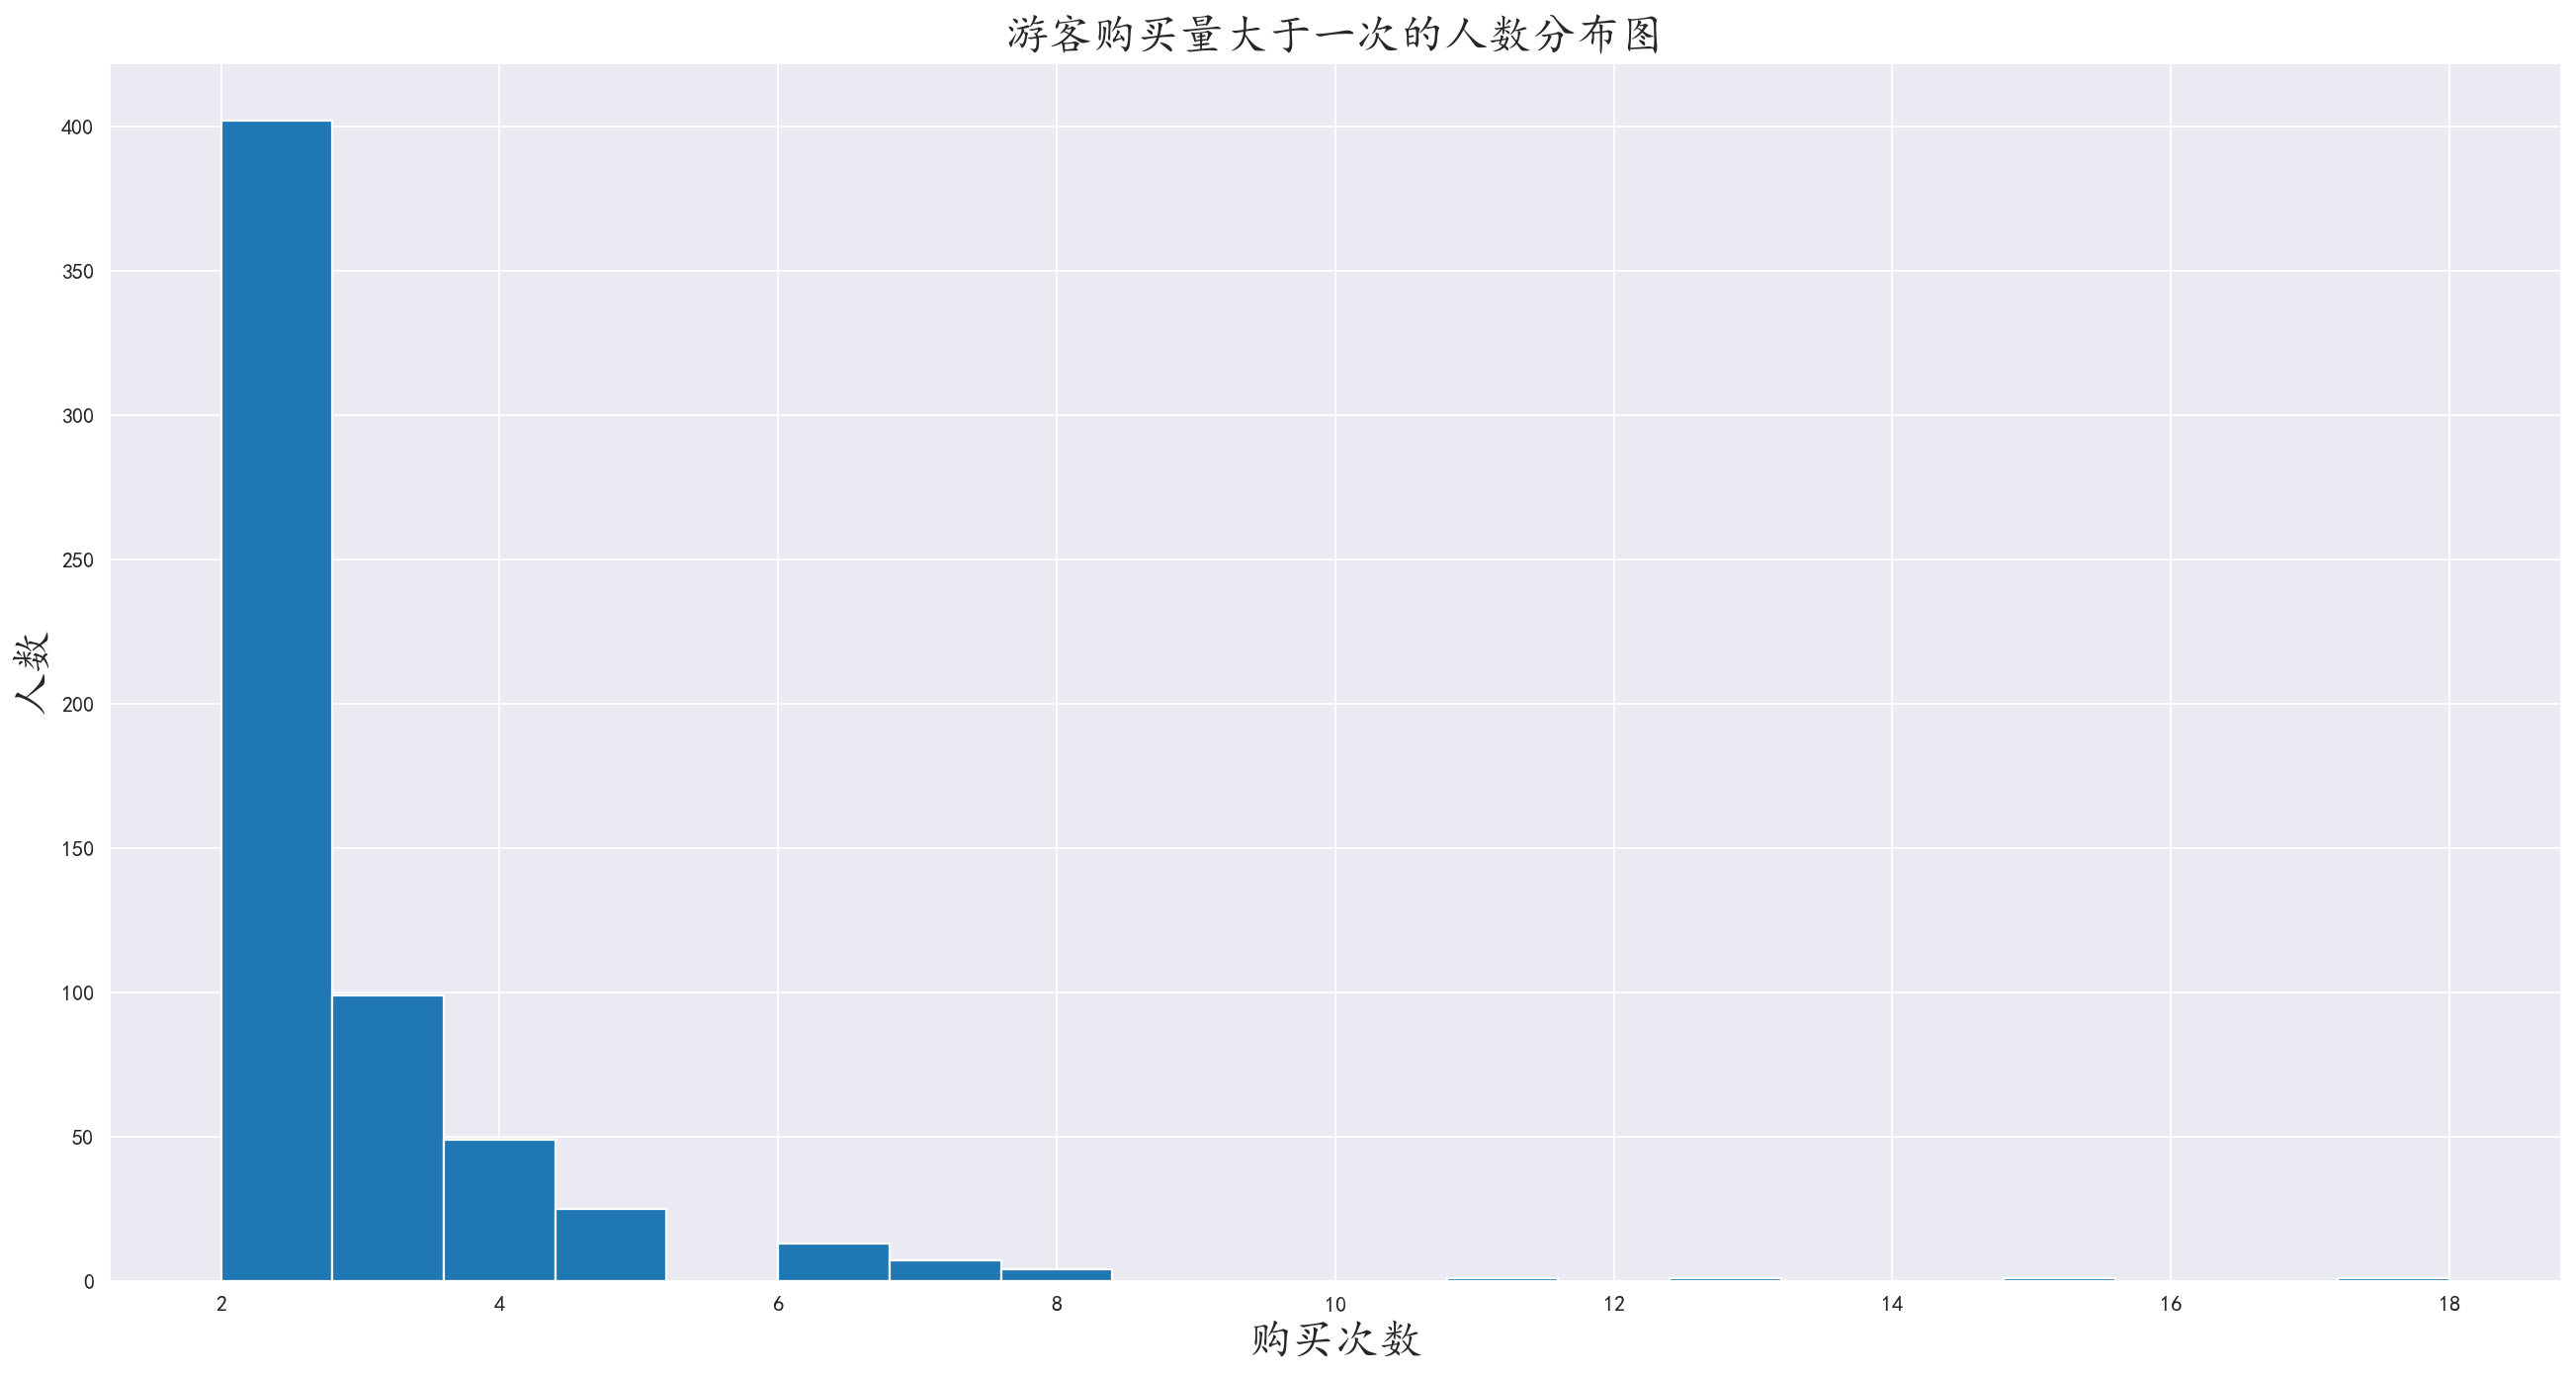

In [8]:
# 分析购买次数两次以上的人数分布
plt.figure(figsize=(20,10), dpi=160)
order_multiple = visitor_order_data[visitor_order_data['frequency'] > 1]
order_multiple['frequency'].plot(kind='hist', bins = 20)
plt.title("游客购买量大于一次的人数分布图", fontsize=20)
plt.xlabel('购买次数', fontsize=20)
plt.ylabel('人数', fontsize=20)

Text(0.5, 1.0, '购买次数2~5次的人数分布图')

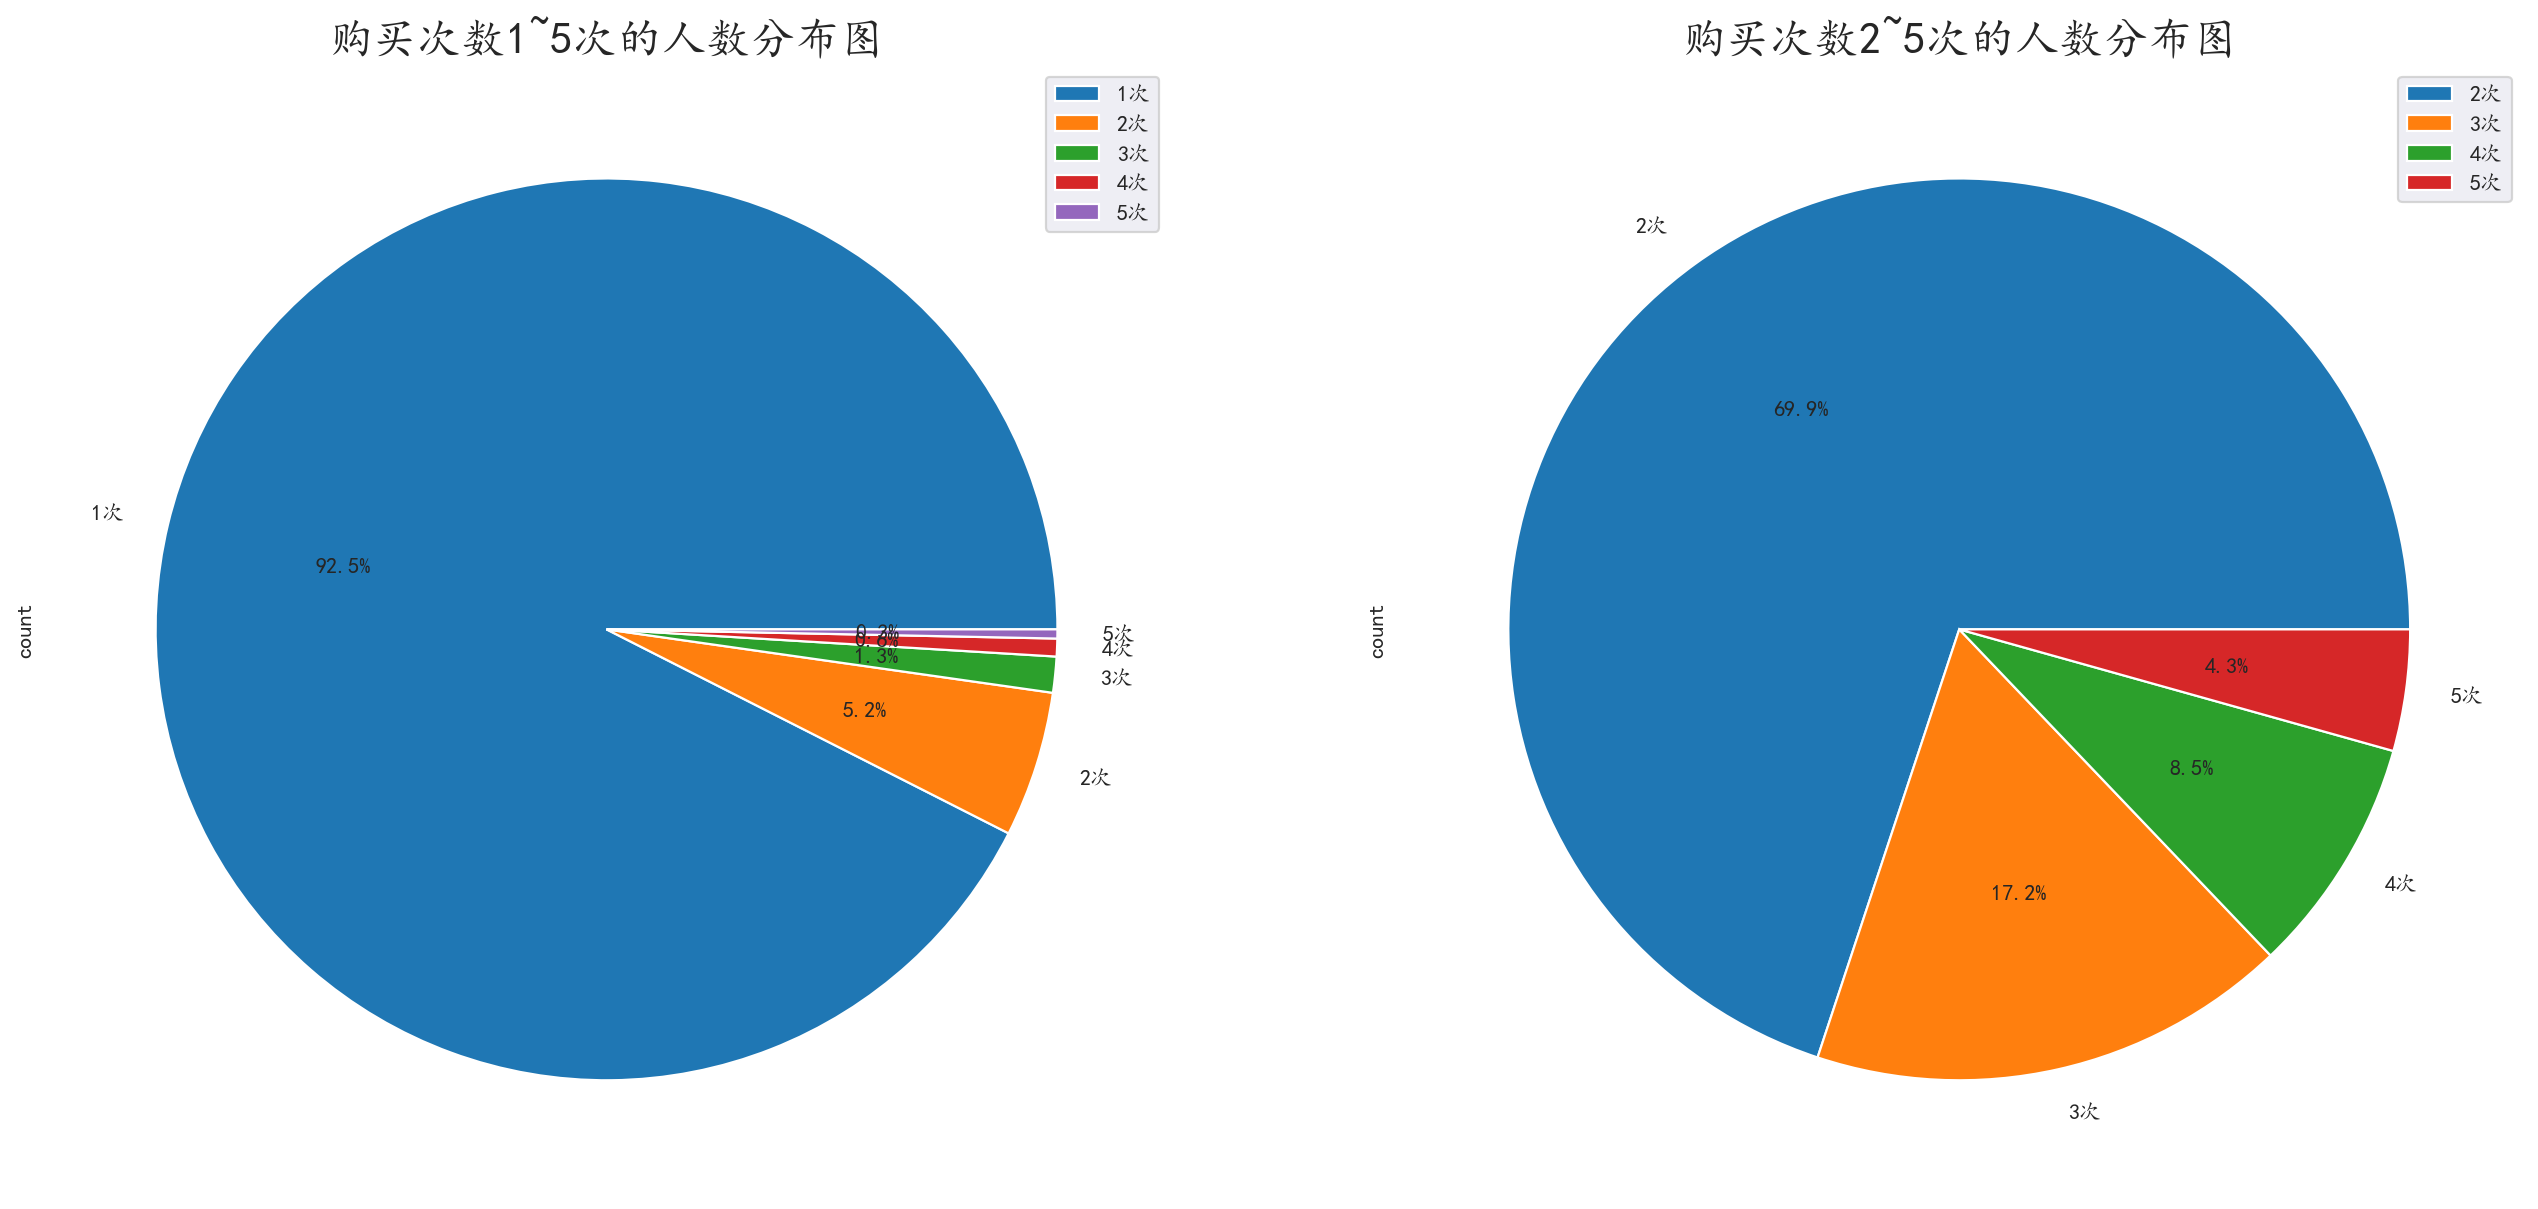

In [9]:
values_1 = visitor_order_data[visitor_order_data['frequency'] <= 5]
plt.figure(figsize=(20,10), dpi=160)
plt.subplot(121)
values_1['frequency'].value_counts().plot.pie(autopct='%1.1f%%', labels=['1次', '2次', '3次', '4次', '5次'])
plt.legend()
plt.title('购买次数1~5次的人数分布图', fontsize=20)

plt.subplot(122)
values_2 = values_1[values_1['frequency'] > 1]
values_2['frequency'].value_counts().plot.pie(autopct='%1.1f%%', labels=['2次', '3次', '4次', '5次'])
plt.legend()
plt.title('购买次数2~5次的人数分布图', fontsize=20)

### 分析复购率

Text(0, 0.5, '复购人数')

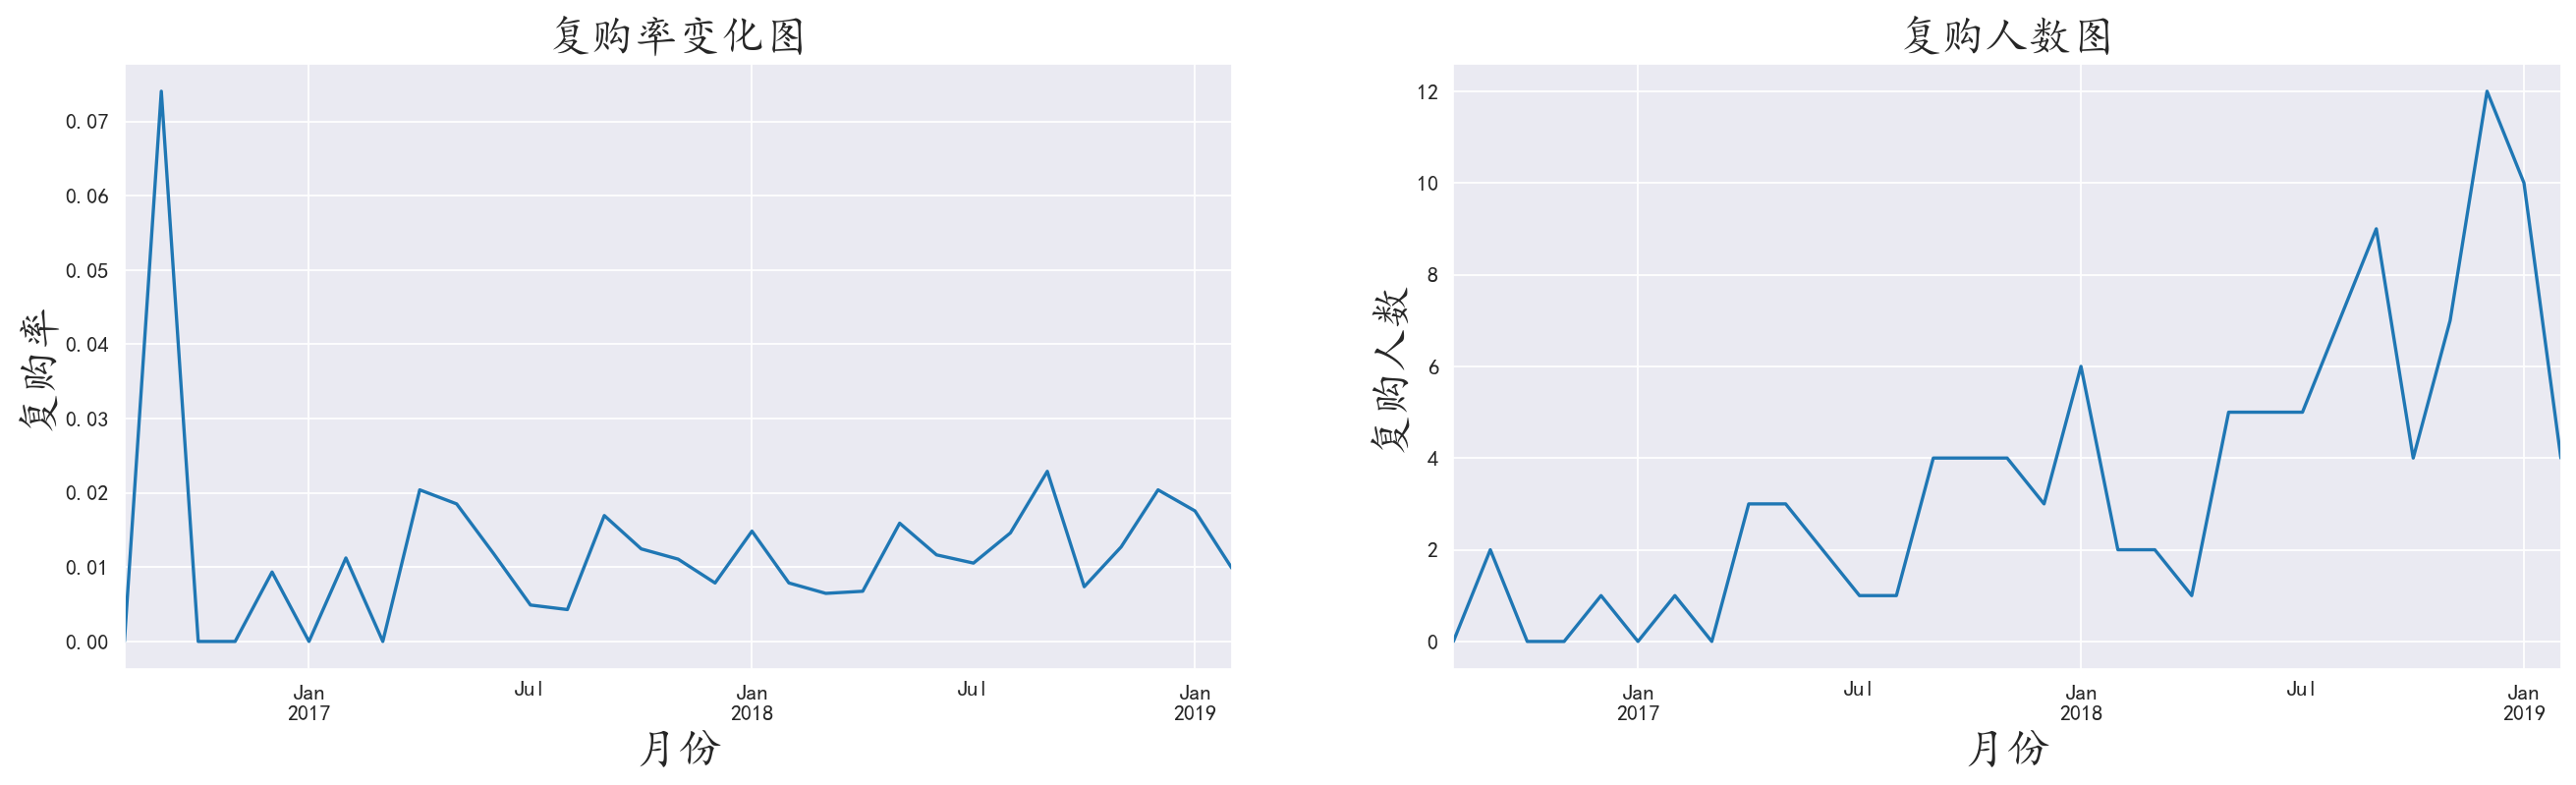

In [10]:
review_user = df.pivot_table(index='author',
                       columns='month', 
                       values='frequency',
                        aggfunc='count').fillna(0)
review_user_data = review_user.map(lambda x: 1 if x > 1 else 0 if x == 1 else np.nan)
total_num = review_user_data.count() # 参与人数
review_num = review_user_data.sum() # 复购人数
review_percent = review_num / total_num

plt.figure(figsize=(20, 5), dpi=160)
plt.subplot(121)
review_percent.plot()
plt.title("复购率变化图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('复购率', fontsize=20)

plt.subplot(122)
review_num.plot()
plt.title("复购人数图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('复购人数', fontsize=20)

### 分析回购率

Text(0, 0.5, '回购人数')

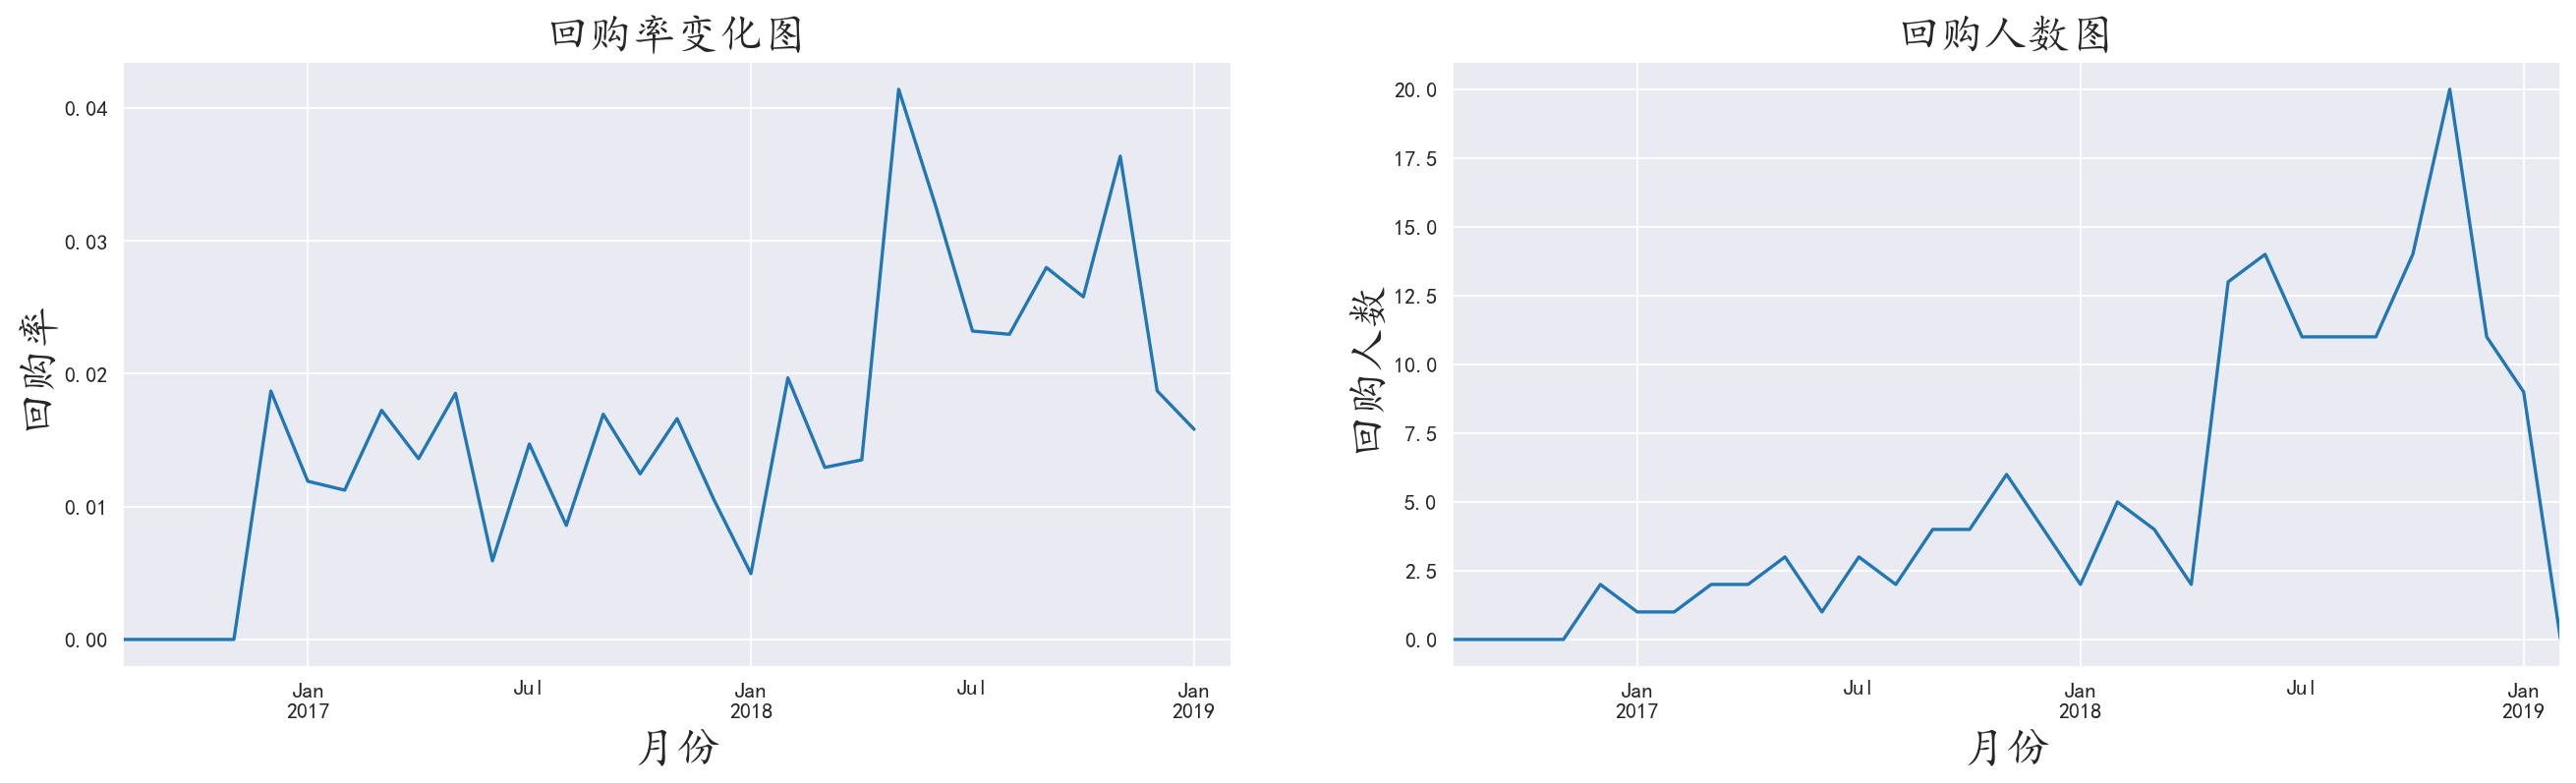

In [11]:
def return_func(data):
    status = []
    for i in range(data.shape[0] - 1):
        if data.iloc[i] >= 1: # 这个月有购买
            if data.iloc[i+1] >= 1: # 下个月还有购买
                status.append(1)
            else: # 下个月没有购买
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status, review_user.columns)


return_data = review_user.apply(return_func, axis=1)
return_num = return_data.sum() # 回购人数
total_return_num = return_data.count() # 参与购买人数
return_num_percent = return_num / total_return_num

plt.figure(figsize=(20, 5), dpi=160)
plt.subplot(121)
return_num_percent.plot()
plt.title("回购率变化图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('回购率', fontsize=20)

plt.subplot(122)
return_num.plot()
plt.title("回购人数图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('回购人数', fontsize=20)

### 对用户状态进行分析
##### 未注册：unreg  新用户：new  活跃用户：active  不活跃用户：inactive  回流用户：return

In [12]:
# 未注册：unreg  新用户：new  活跃用户：active  不活跃用户：inactive  回流用户：return
def user_status_func(data):
    status = []
    for i in range(data.shape[0]):
        if data.iloc[i] >= 1: #本月消费了
            if len(status) == 0:
                status.append('new')
            elif status[i-1] == 'unreg':
                status.append('new')
            elif data.iloc[i-1] == 0: # 前一个月未消费
                status.append('return')
            else:
                status.append('active')
        else: # 本月未消费
            if len(status) == 0:
                status.append('unreg')
            elif status[i-1] == 'unreg':
                status.append('unreg')
            else:
                status.append('inactive')
    return pd.Series(status, review_user.columns)
                    


user_status = review_user.apply(user_status_func, axis=1)
user_status

month,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,inactive,inactive
Goh Yu Wen Eunice,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
Hui Shan,unreg,unreg,unreg,unreg,new,inactive,inactive,inactive,inactive,inactive,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
Huihui,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
KO-CHENG,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
華山,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
蘇,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive


Text(0, 0.5, '状态人数')

<Figure size 3200x1600 with 0 Axes>

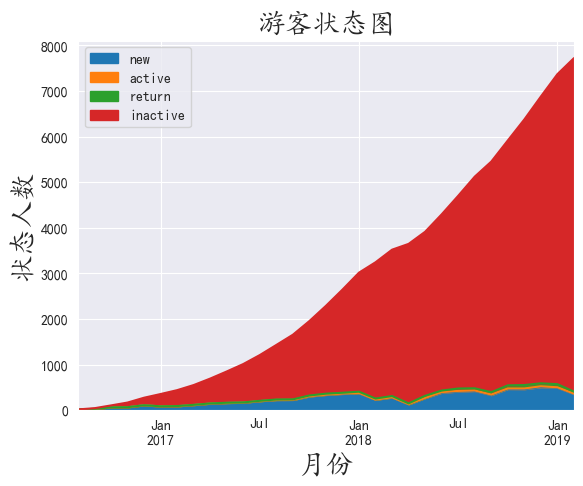

In [13]:
temp_user_status = user_status.replace('unreg', np.nan).apply(lambda x: x.value_counts())
user_status_data = temp_user_status.fillna(0).reindex(['new', 'active', 'return', 'inactive']).T

plt.figure(figsize=(20, 10), dpi=160)
user_status_data.plot.area()
plt.title("游客状态图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('状态人数', fontsize=20)

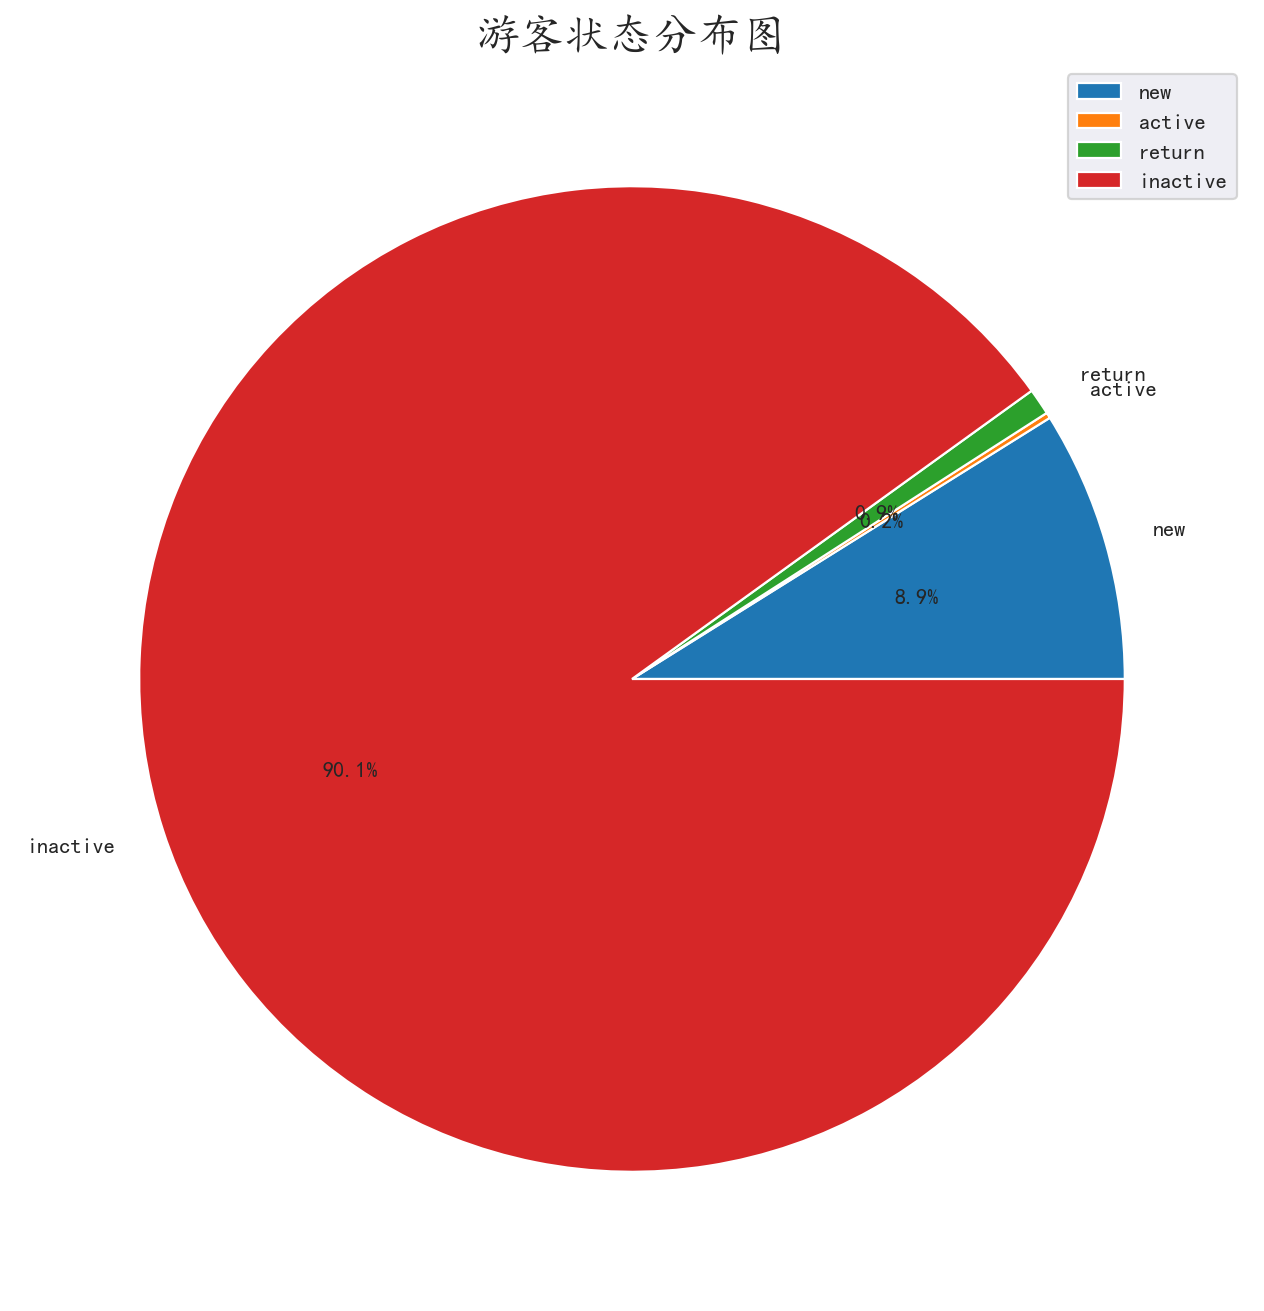

In [14]:

plt.figure(figsize=(20, 10), dpi=160)
user_status_data.sum().plot.pie(autopct='%1.1f%%', labels=['new', 'active', 'return', 'inactive'])
plt.title("游客状态分布图", fontsize=20)
plt.legend()

Text(0, 0.5, '状态占比')

<Figure size 3200x1600 with 0 Axes>

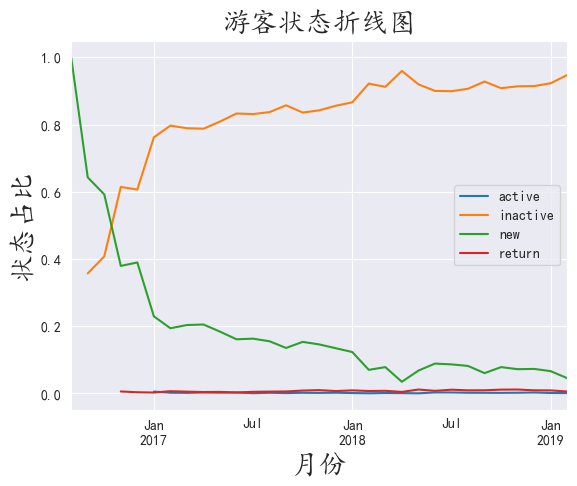

In [15]:
# 查看各类用户的折线图
plt.figure(figsize=(20, 10), dpi=160)
user_status_percent = temp_user_status.apply(lambda x: x/x.sum()).T
user_status_percent.plot()
plt.title("游客状态折线图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('状态占比', fontsize=20)

Text(0, 0.5, '状态占比')

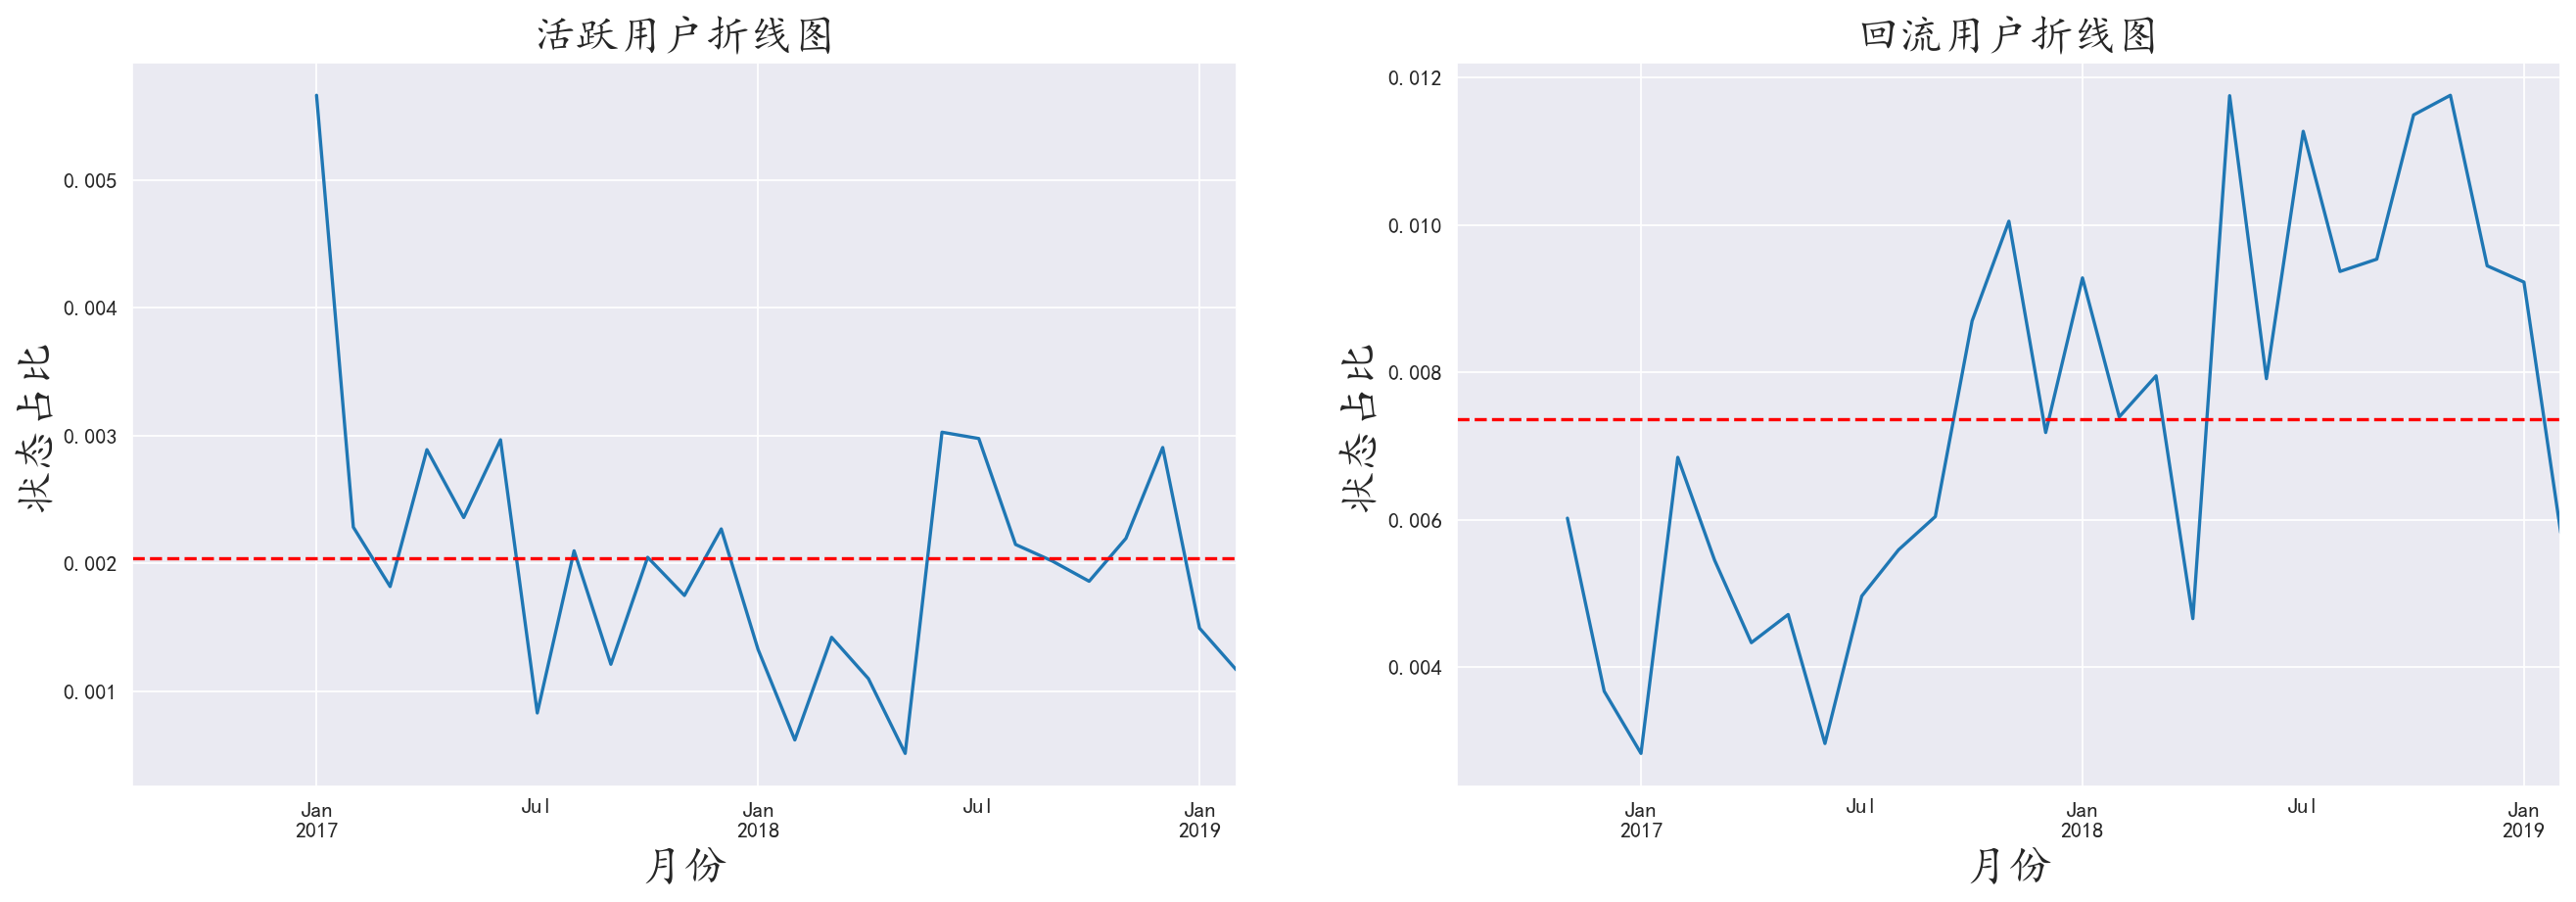

In [16]:
plt.figure(figsize=(20, 6), dpi=160)
plt.subplot(121)
user_status_percent['active'].plot()
plt.axhline(y=user_status_percent['active'].mean(), color='r', linestyle='--')
plt.title("活跃用户折线图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('状态占比', fontsize=20)

plt.subplot(122)
user_status_percent['return'].plot()
plt.axhline(y=user_status_percent['return'].mean(), color='r', linestyle='--')
plt.title("回流用户折线图", fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('状态占比', fontsize=20)

### 计算用户的生命周期

Text(0, 0.5, '人数')

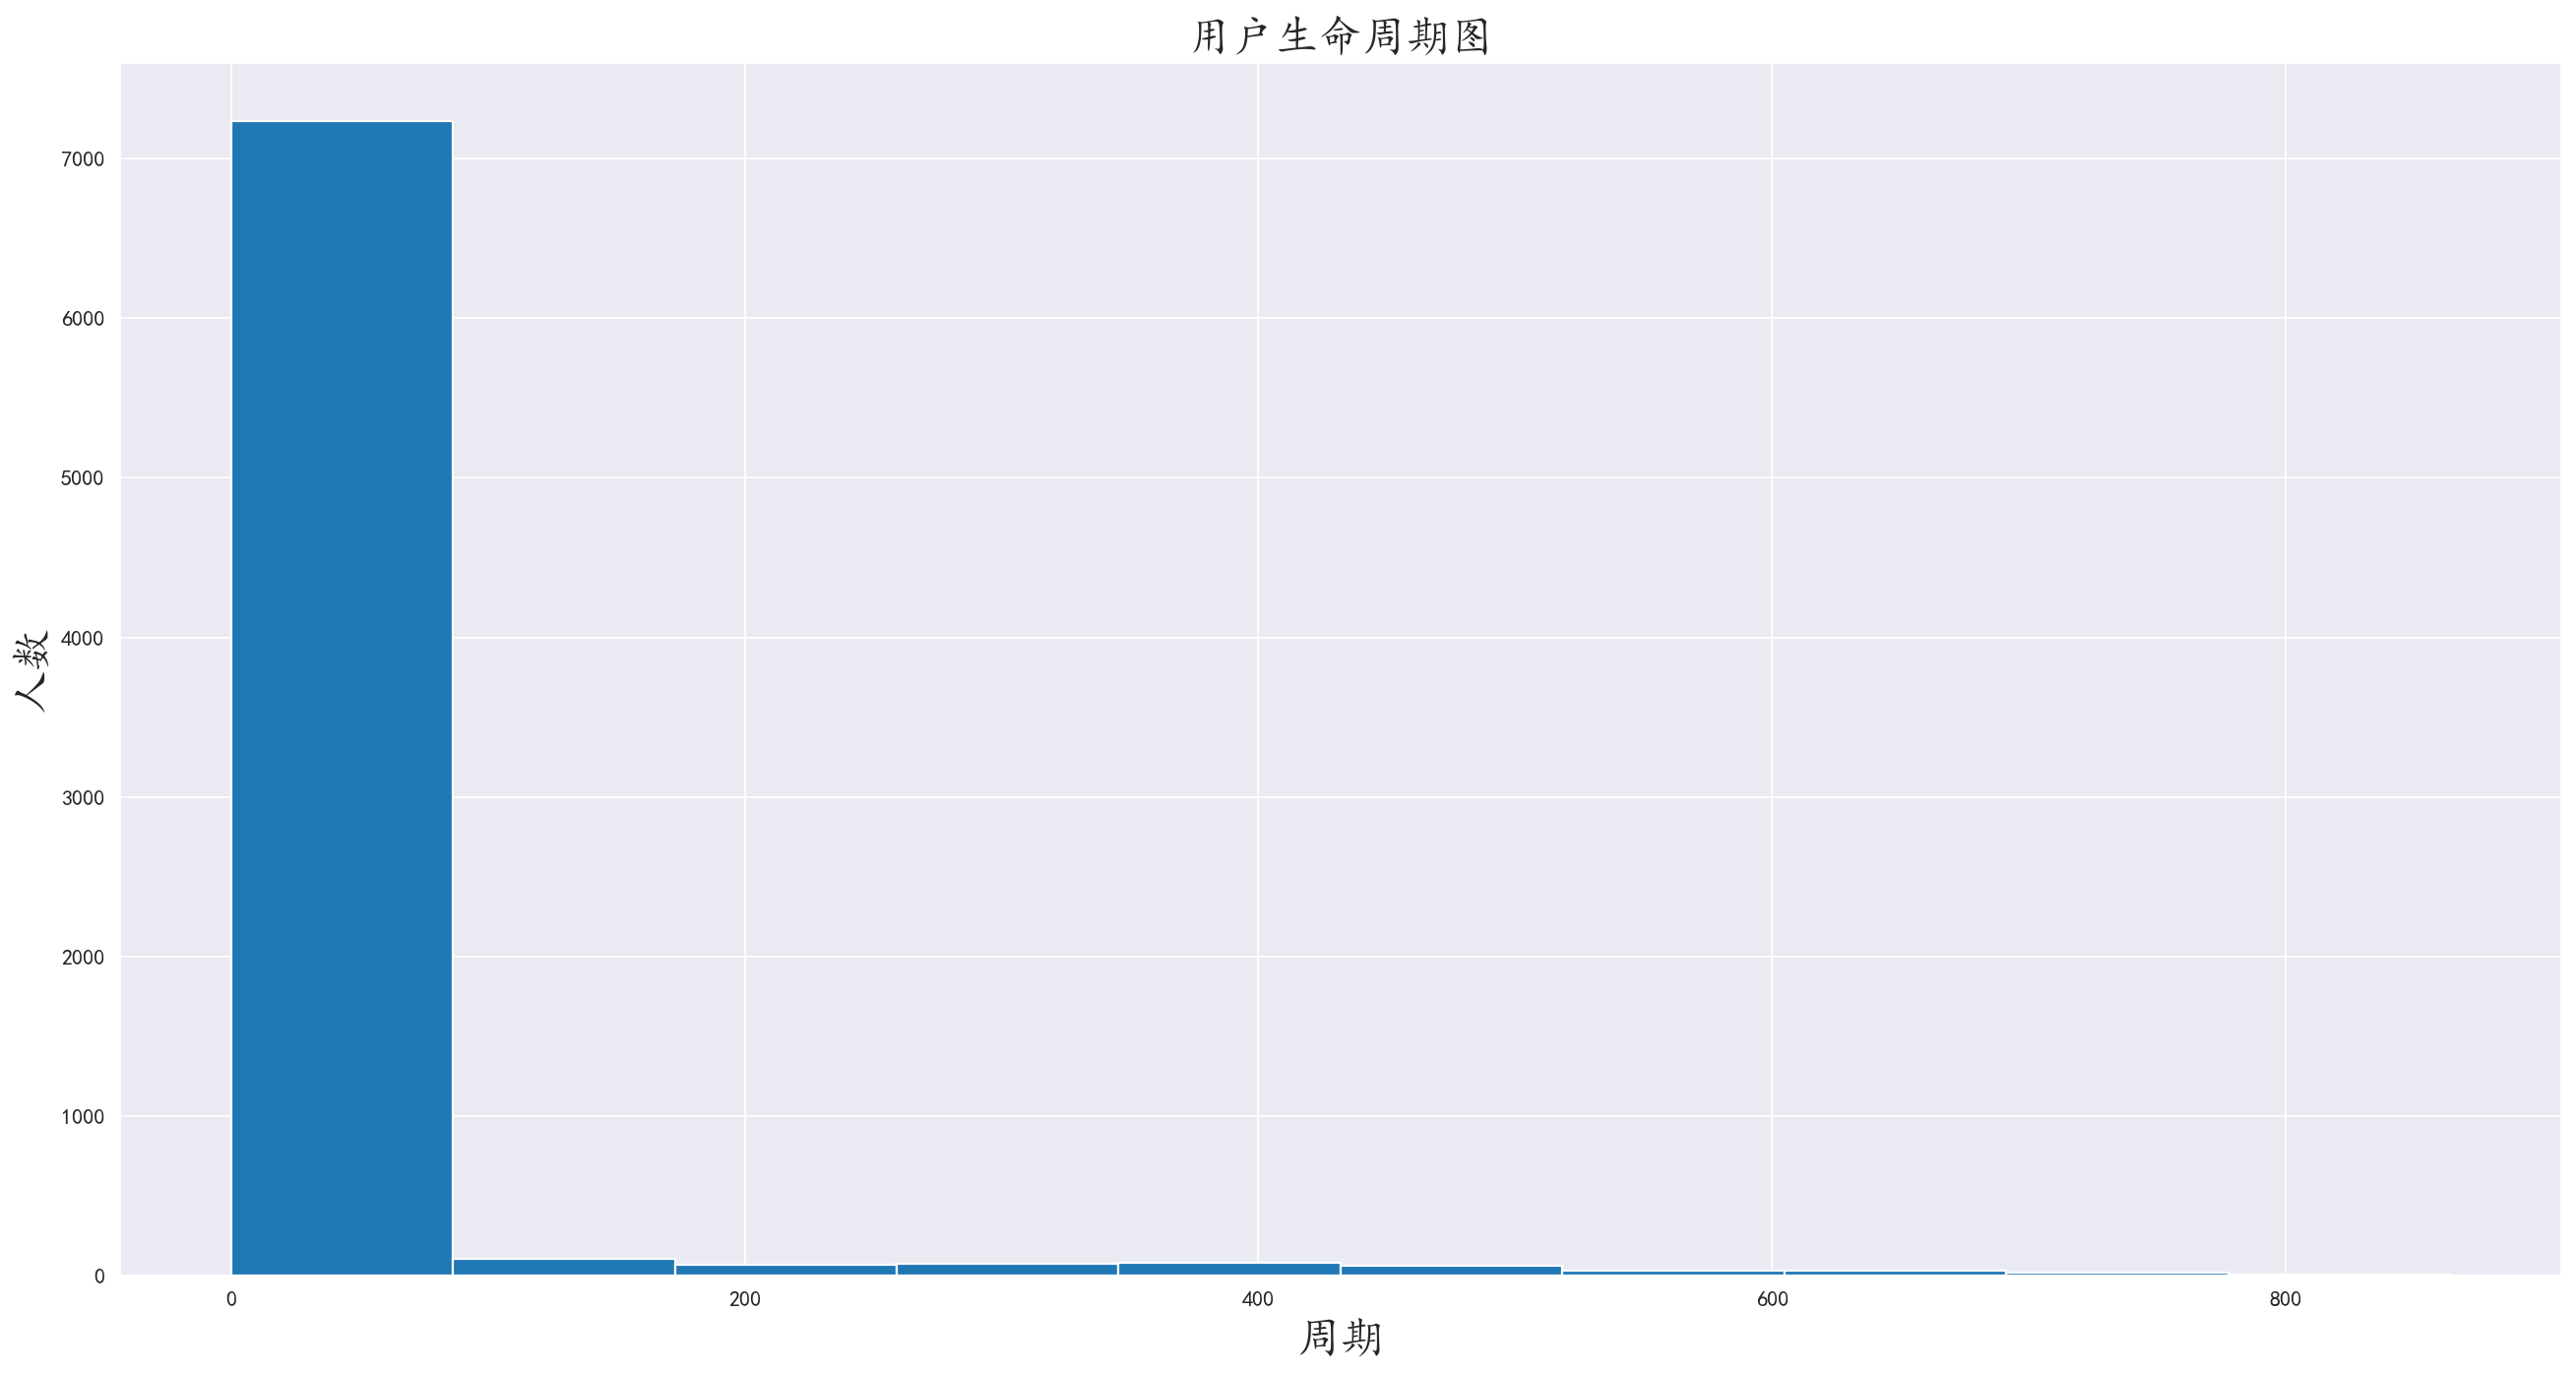

In [17]:
# 生命周期大于等于0天的
user_time = df.groupby(by='author')['time'].apply(lambda x: x.max() - x.min())

plt.figure(figsize=(20, 10), dpi=160)
(user_time / np.timedelta64(1, 'D')).plot.hist(bins=10)
plt.title("用户生命周期图", fontsize=20)
plt.xlabel('周期', fontsize=20)
plt.ylabel('人数', fontsize=20)

Text(0, 0.5, '人数')

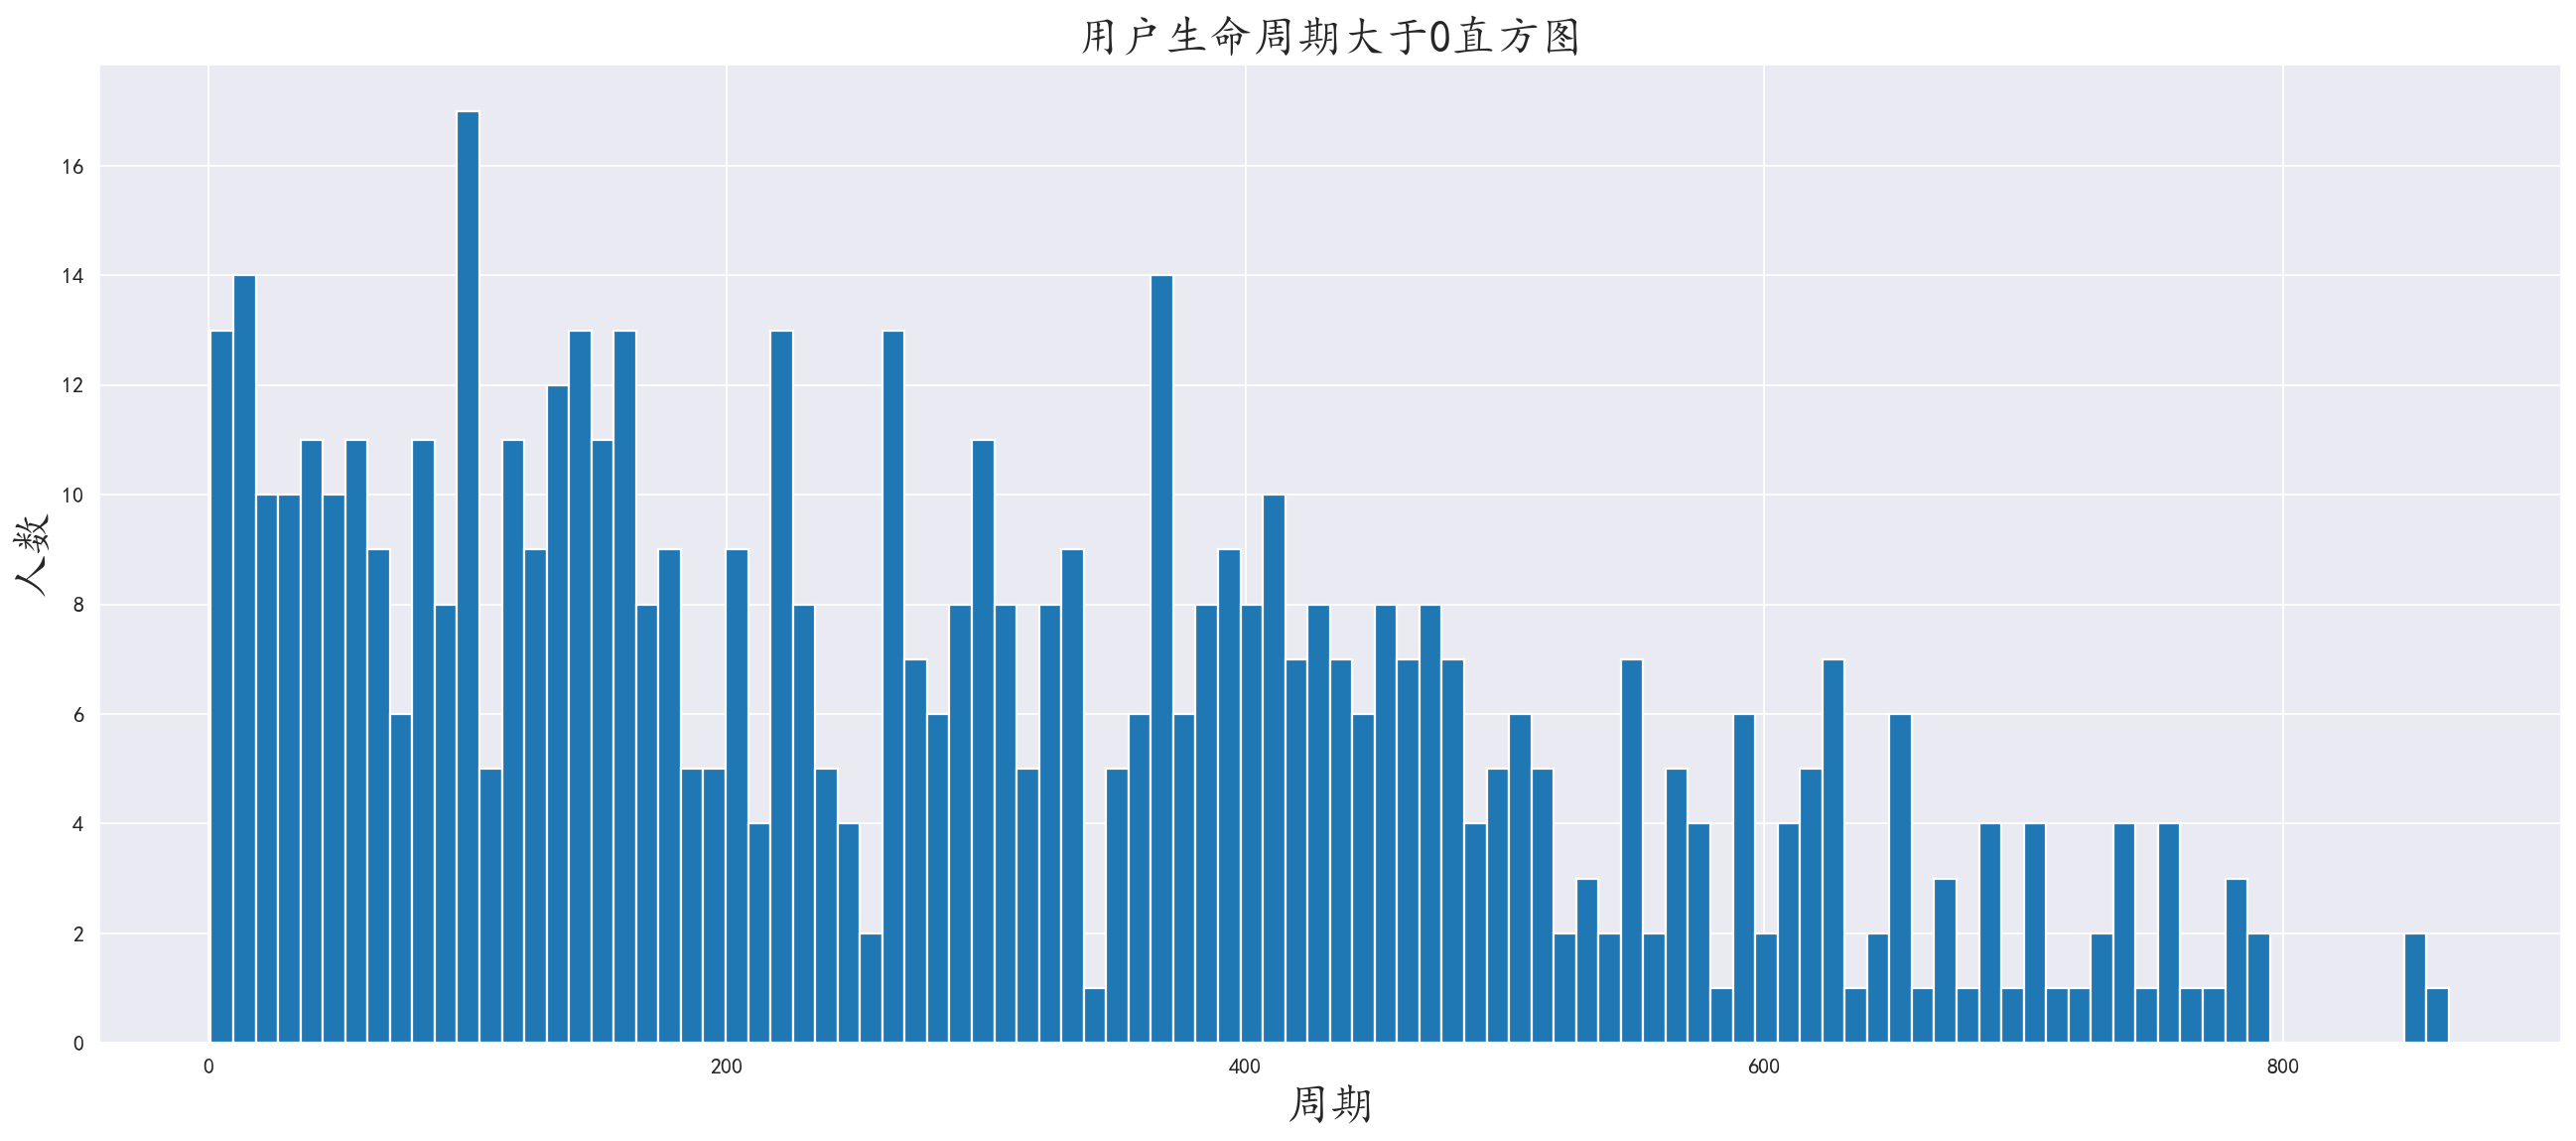

In [18]:
# 生命周期大于0天的
user_time = df.groupby(by='author')['time'].apply(lambda x: x.max() - x.min())
user_time_count = user_time / np.timedelta64(1, 'D')

plt.figure(figsize=(20, 8), dpi=160)
user_time_count[user_time_count > 0].plot.hist(bins=100)
plt.title("用户生命周期大于0直方图", fontsize=20)
plt.xlabel('周期', fontsize=20)
plt.ylabel('人数', fontsize=20)

### 留存率分析
##### 留存天数：每次消费时间 - 第一次消费时间

retention_time_bin
(0, 90]       0.025771
(90, 180]     0.022533
(180, 270]    0.018389
(270, 360]    0.017094
(360, 450]    0.016447
(450, 540]    0.011785
(540, 630]    0.009065
(630, 720]    0.006734
(720, 810]    0.003626
(810, 900]    0.000648
dtype: float64


C:\Users\heimaolala\AppData\Local\Temp\ipykernel_10668\3929243854.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_data = user_purchase_retention.groupby(['author', 'retention_time_bin'])['frequency'].sum().unstack()


Text(0, 0.5, '留存率')

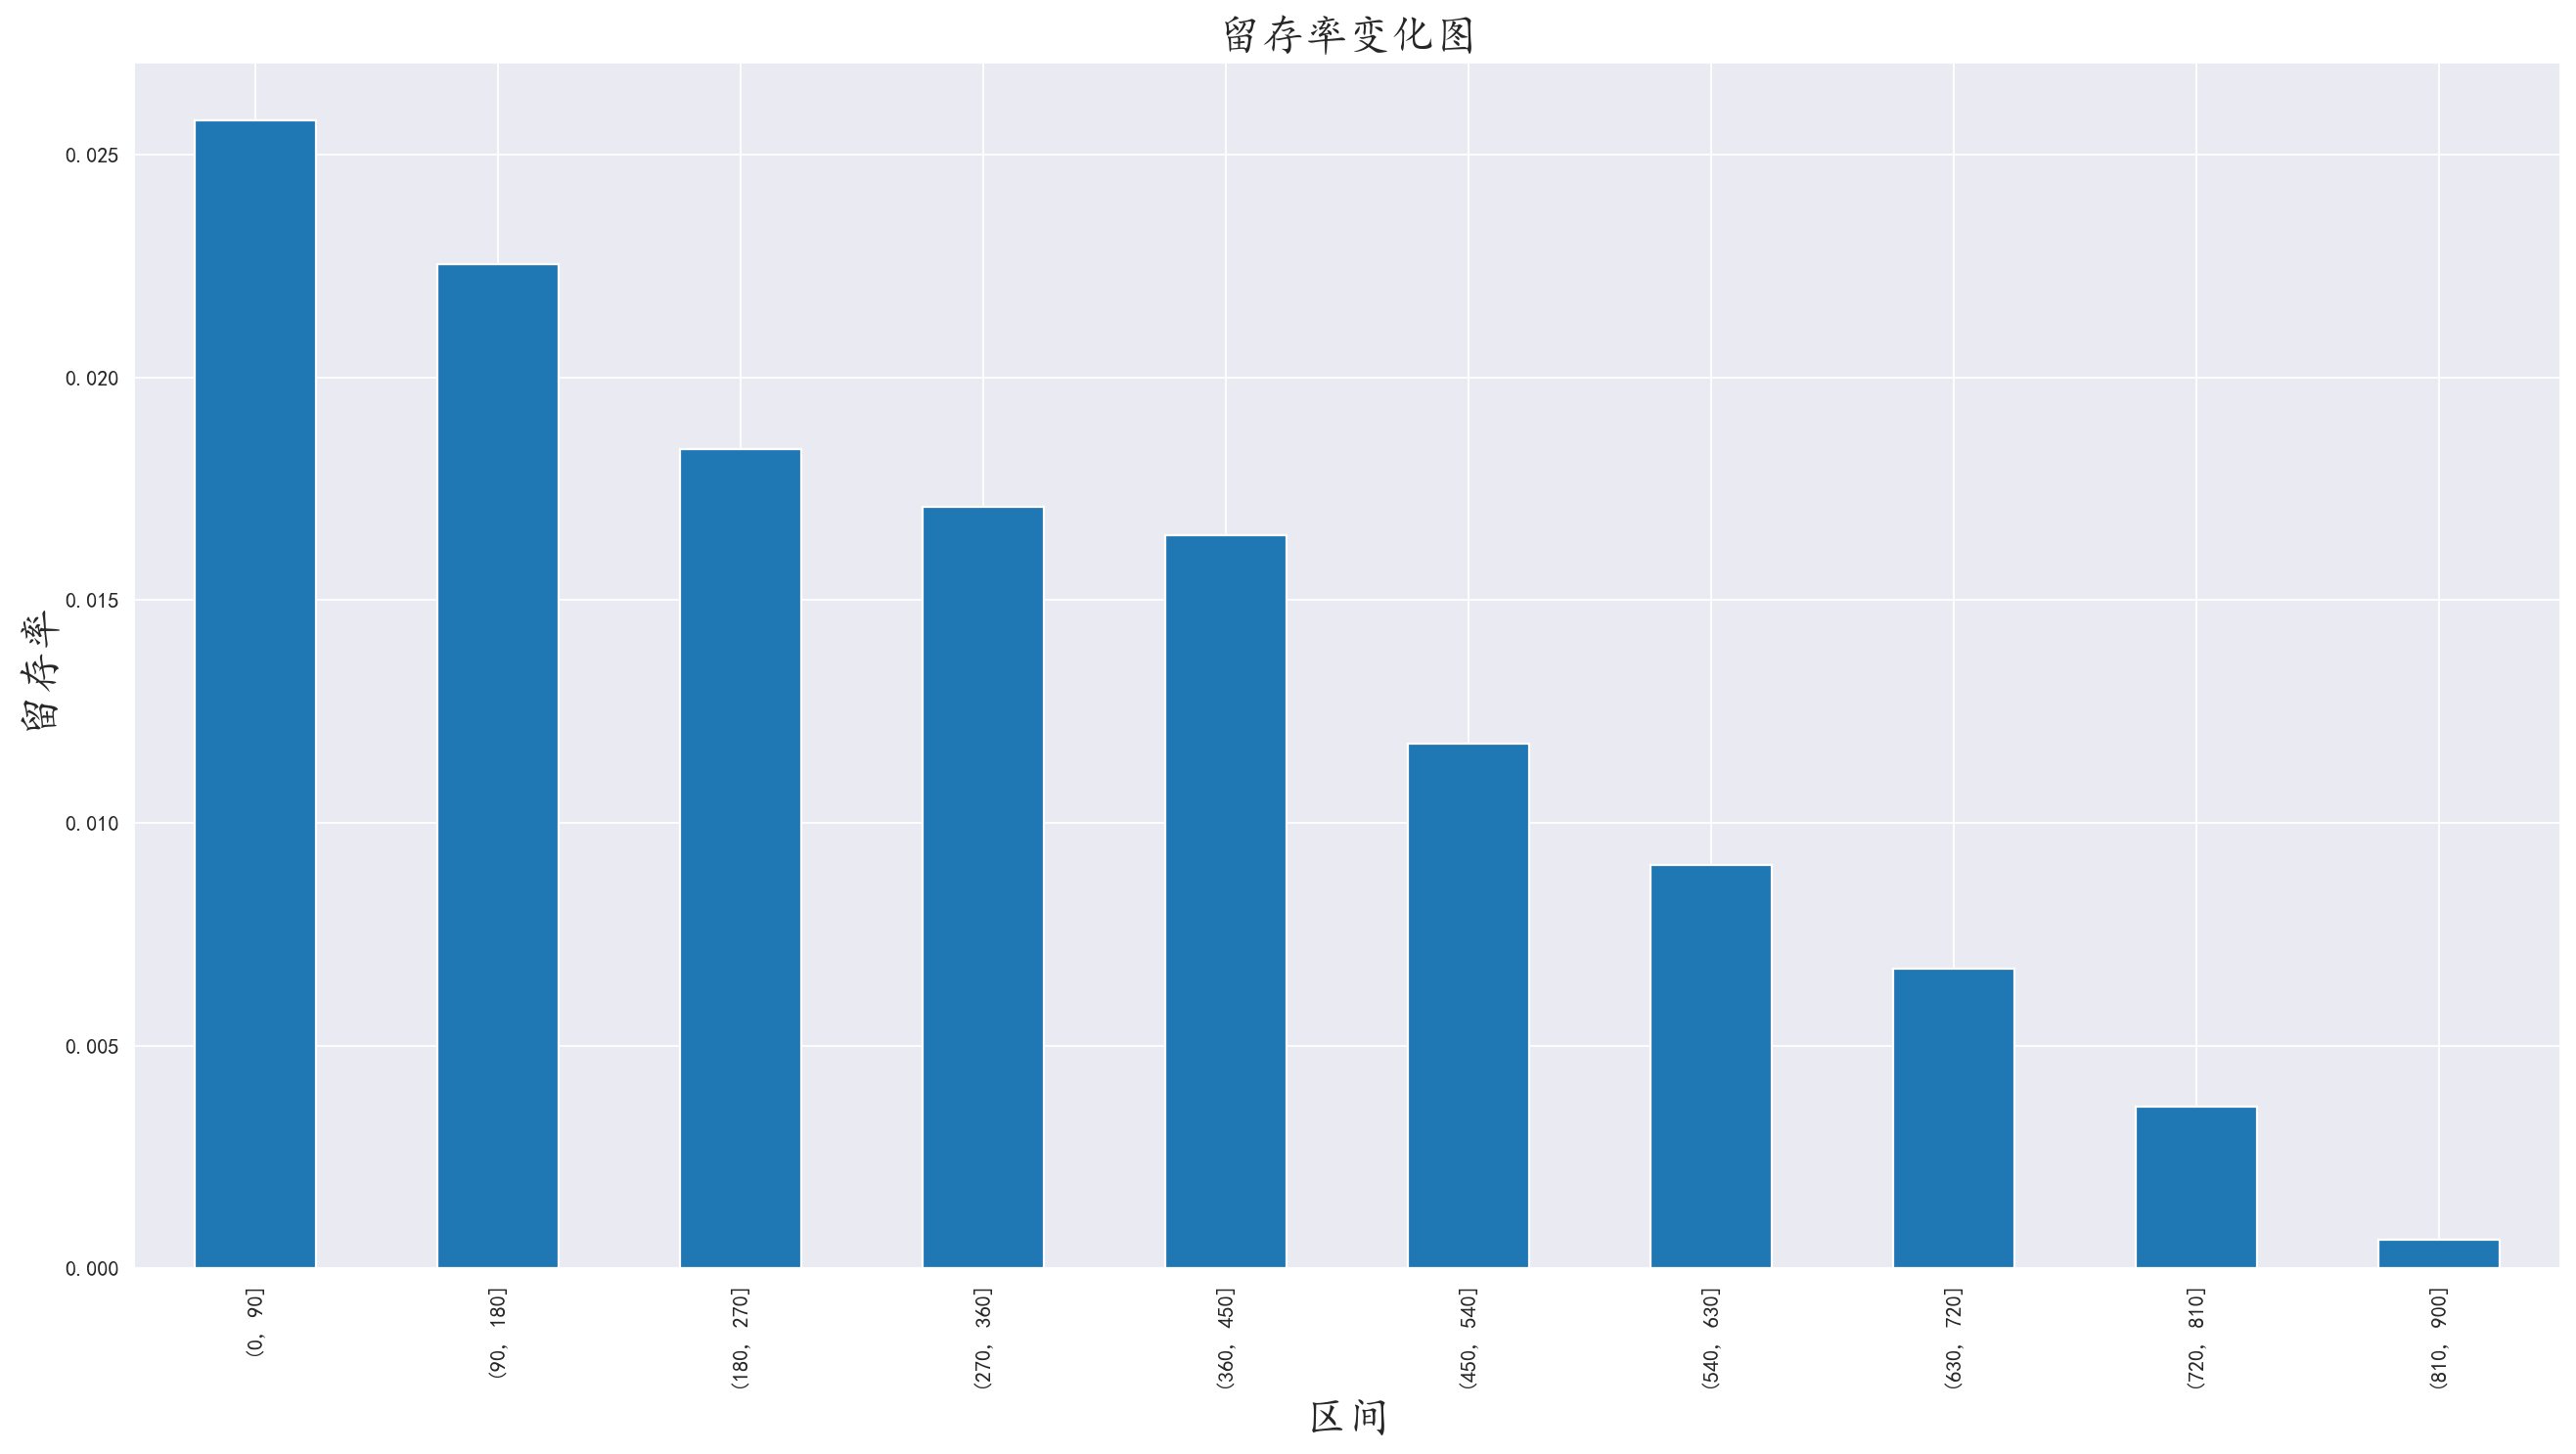

In [19]:

user_first_time = df.groupby(by='author')['time'].min().reset_index()
user_purchase_retention = pd.merge(df, user_first_time, on='author', suffixes=('', '_min'))
user_purchase_retention['retention_time'] = (user_purchase_retention['time'] - user_purchase_retention['time_min']) / np.timedelta64(1, 'D')

bins = [i*90 for i in range(11)]

user_purchase_retention['retention_time_bin'] = pd.cut(user_purchase_retention['retention_time'], bins=bins)
retention_data = user_purchase_retention.groupby(['author', 'retention_time_bin'])['frequency'].sum().unstack()

range_total_num = retention_data.count()
retention_num = retention_data.sum()
retention_percent = retention_num / range_total_num
print(retention_percent)

plt.figure(figsize=(20, 10), dpi=160)
retention_percent.plot(kind='bar')
plt.title("留存率变化图", fontsize=20)
plt.xlabel('区间', fontsize=20)
plt.ylabel('留存率', fontsize=20)